### The Goal of Experimental Design

The purpose of a formal experiment is to move from informal observations to robust, quantifiable conclusions about cause and effect. It provides an objective and controlled way to test a specific hypothesis. Instead of a vague statement like "X probably affected Y," a well-designed experiment combined with statistical analysis allows for a precise conclusion, such as:

> "The evidence indicates that X had a statistically significant effect on Y, with a 5% risk of a Type I error (a false positive)."

This level of rigor is essential in fields ranging from medical research and product analytics to marketing and government policy.

#### Core Terminology

  * **Subjects**: The entities on which the experiment is performed (e.g., users, patients, employees, plots of land).
  * **Treatment Group**: The group of subjects that receives the specific change or intervention being tested.
  * **Control Group**: The group of subjects that does not receive the treatment. This group serves as a baseline for comparison, showing what would have happened without the intervention.

### The Critical Role of Random Assignment

The validity of an experiment's conclusion rests almost entirely on how subjects are assigned to the treatment and control groups. The goal is to create two groups that are as similar as possible in every respect *before* the treatment is applied.

#### The Flaw of Non-random Assignment

A common but incorrect approach is to assign subjects non-randomly, for example, by splitting a list of users in half. This method is highly susceptible to **selection bias**. If there is any underlying order in the data (e.g., users are sorted by their sign-up date or activity level), the two groups will be systematically different from the start. Any observed difference in the outcome could be due to this pre-existing difference, not the treatment, making the experiment's results invalid.

```python
import pandas as pd
import numpy as np

# Create a generic dataset of 200 subjects, sorted by a baseline metric
# This simulates a non-random ordering
np.random.seed(42)
subjects = pd.DataFrame({
    'id': np.arange(200),
    'baseline_metric': np.sort(np.random.normal(loc=100, scale=10, size=200))
})

# Non-random assignment by slicing the DataFrame
group1_nonrandom = subjects.iloc[0:100]
group2_nonrandom = subjects.iloc[100:]

# Compare the baseline metric for the two groups
print("Group 1 Mean:", group1_nonrandom['baseline_metric'].mean())
print("Group 2 Mean:", group2_nonrandom['baseline_metric'].mean())
```

The means are significantly different *before* any treatment is applied. An experiment conducted on these groups would be fundamentally flawed.

#### The Solution: Random Assignment

**Random assignment** is the cornerstone of experimental design. By randomly assigning each subject to either the treatment or control group, we ensure that, on average, any pre-existing characteristics (both known and unknown) are distributed equally between the two groups. This isolates the treatment as the only systematic difference, allowing us to confidently attribute any observed change in the outcome to the treatment itself.

In pandas, this can be achieved using the `.sample()` method.

```python
# Random assignment using .sample() 
# Randomly select 50% of subjects for Group 1
group1_random = subjects.sample(frac=0.5, random_state=42)
# The remaining subjects go into Group 2
group2_random = subjects.drop(group1_random.index)

# Compare the baseline metric for the two randomly assigned groups
print("Group 1 Mean:", group1_random['baseline_metric'].mean())
print("Group 2 Mean:", group2_random['baseline_metric'].mean())
```

With random assignment, the baseline means of the two groups are now nearly identical. This creates a fair and unbiased starting point for the experiment, ensuring that any significant difference observed after the treatment can be attributed to the treatment itself.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
url = "https://raw.githubusercontent.com/jhlopesalves/data-science-practice-notebook/refs/heads/main/Python/statistics/experimental_design/data/weights.csv"
weights = pd.read_csv(url, usecols=lambda col: not col.startswith("Unnamed"))

In [3]:
# Select the first 250 rows for group 1 (non-random assignment)
group1_non_rand = weights.iloc[0:250]

# Select the remaining rows for group 2 (non-random assignment)
group2_non_rand = weights.iloc[250:]

# Concatenate descriptive statistics of both groups for comparison
compare_df_non_rand = pd.concat(
    [group1_non_rand["weight"].describe(), group2_non_rand["weight"].describe()], axis=1
)

display(compare_df_non_rand)

,weight,weight
count,250.000000,250.000000
mean,58.821560,71.287480
std,4.503791,5.019958
min,39.070000,65.100000
25%,56.200000,67.490000
50%,59.390000,70.115000
75%,62.527500,73.770000
max,65.100000,95.820000


In [4]:
# Randomly sample 50% of the data without replacement for group 1
group1_random = weights.sample(frac=0.5, random_state=42, replace=False)

# Assign the remaining data to group 2 by dropping group 1 indices
group2_random = weights.drop(group1_random.index)

# Combine descriptive statistics of both groups into a single DataFrame for comparison
compare_df_random = pd.concat(
    [group1_random["weight"].describe(), group2_random["weight"].describe()], axis=1
)

# Rename columns to reflect group names for clarity
compare_df_random.columns = ["group1", "group2"]

display(compare_df_random)

,group1,group2
count,250.000000,250.000000
mean,64.499960,65.609080
std,8.073025,7.596346
min,39.070000,44.040000
25%,58.660000,60.312500
50%,64.620000,65.540000
75%,69.957500,70.442500
max,86.760000,95.820000


While simple randomization is the foundation of experimental design, it can sometimes result in imbalances between groups by pure chance. Advanced techniques like **block randomization** ensure equal group sizes, while **stratified randomization** ensures that key baseline characteristics (**covariates**) are evenly distributed between the treatment and control groups, which helps to isolate the treatment's true effect.

## The Limitations of Simple Randomization

Simple random assignment is a powerful tool, but it is not without potential issues, especially in smaller experiments:

1.  **Uneven Group Sizes**: When using a method like `df.sample(frac=0.5)`, random chance might lead to slightly different numbers of subjects in the treatment and control groups.
2.  **Covariate Imbalance**: A more critical issue is the potential for an imbalance in **covariates**. A covariate is a baseline variable (like age, location, or user status) that could also influence the outcome of the experiment. If, by chance, one group ends up with a higher proportion of a key covariate, this can become a **confounding variable**, making it difficult to distinguish between the effect of the treatment and the effect of the pre-existing group imbalance.

### Advanced Randomization Techniques

To mitigate these issues, more sophisticated randomization techniques are often employed.

#### Block Randomization

**Block randomization** is a procedure used to ensure that the number of subjects in the treatment and control groups remains equal or very close throughout the subject recruitment process.

  * **Purpose**: To prevent imbalances in group sizes.
  * **How it works**: Subjects are divided into "blocks" of a pre-determined size (e.g., blocks of 4). Within each block, a random half of the subjects are assigned to the treatment group and the other half to the control group. This process is repeated for each new block of subjects.

#### Stratified Randomization

**Stratified randomization** is a technique used to control for potential confounding variables by ensuring that key baseline characteristics are perfectly balanced across the experimental groups.

  * **Purpose**: To eliminate the influence of important covariates.
  * **How it works**:
    1.  First, the population is divided into subgroups, or **strata**, based on the covariate(s) of interest (e.g., one stratum for "power users" and another for "not power users").
    2.  Then, within **each stratum**, a separate simple randomization is performed to assign subjects to the treatment and control groups.

This two-step process guarantees that the proportion of subjects with that characteristic (e.g., the percentage of power users) is identical in both the treatment and control groups.

#### A Complete Example: Simple vs. Stratified Randomization

Let's demonstrate the value of stratified randomization with a complete example.

**Scenario**: We want to test a new website feature (the treatment) to see if it increases `basket_size`. We know that `power_user` status is a strong predictor of `basket_size`, making it a potential confounding variable.

```python
import pandas as pd
import numpy as np

# 1. Create a generic, reproducible dataset
np.random.seed(42)
df = pd.DataFrame({
    'user_id': np.arange(1000),
    'power_user': np.random.choice([0, 1], 1000, p=[0.9, 0.1])
})

# 2. Simple Random Assignment 
# Assign 50% to Treatment ('T') and 50% to Control ('C')
group_T_simple = df.sample(frac=0.5, random_state=42)
group_C_simple = df.drop(group_T_simple.index)
# Check the distribution of the 'power_user' covariate
print("Control Group:\n", group_C_simple['power_user'].value_counts(normalize=True))
print("Treatment Group:\n", group_T_simple['power_user'].value_counts(normalize=True))
# Note: The proportions are close, but not identical, due to random chance.

# 3. Stratified Random Assignment 
# Stratum 1: Not Power Users (power_user == 0)
strata_0 = df[df['power_user'] == 0]
strata_0_T = strata_0.sample(frac=0.5, random_state=42)
strata_0_C = strata_0.drop(strata_0_T.index)

# Stratum 2: Power Users (power_user == 1)
strata_1 = df[df['power_user'] == 1]
strata_1_T = strata_1.sample(frac=0.5, random_state=42)
strata_1_C = strata_1.drop(strata_1_T.index)

# Combine the stratified groups
group_T_stratified = pd.concat([strata_0_T, strata_1_T])
group_C_stratified = pd.concat([strata_0_C, strata_1_C])

# Check the distribution of the 'power_user' covariate again
print("Control Group:\n", group_C_stratified['power_user'].value_counts(normalize=True))
print("Treatment Group:\n", group_T_stratified['power_user'].value_counts(normalize=True))
```

The output demonstrates that with simple randomization, the proportion of power users in the two groups is slightly different due to random chance. With **stratified randomization**, the proportion of power users is **exactly identical** in both the treatment and control groups. This removes the `power_user` status as a potential confounding variable, ensuring that any difference we observe in `basket_size` between the groups can be more confidently attributed to the treatment itself.

In [5]:
# Generate random basket sizes between 0 and 1000 for 1000 users
basket_size = np.random.randint(low=0, high=1001, size=1000)

# Generate base web time (2 to 30 seconds) for all users
base_time = np.random.randint(low=2, high=30, size=1000)

# Calculate the effect of basket size on web time (each $ adds ~0.08 seconds)
size_effect = basket_size * 0.08

# Add random noise (mean=0, std=15) to simulate variability in user behavior
noise = np.random.normal(0, 15, 1000)

# Combine base time, size effect, and noise to compute total web time
web_time = base_time + size_effect + noise

# Clip web time to ensure it stays within realistic bounds (2 to 120 seconds)
web_time = np.clip(web_time, 2, 120).astype(int)

# Create a DataFrame to store basket size and web time
ecom = pd.DataFrame(data={"basket_size": basket_size, "web_time": web_time})

# Mark users as power users (1) if their web time exceeds 40 seconds, else 0
ecom["power_user"] = (ecom["web_time"] > 40).astype(int)

In [6]:
# Randomly sample 50% of the data for group 1, ensuring reproducibility with random_state
group1 = ecom.sample(frac=0.5, random_state=42, replace=False)

# Assign group 1 to Block 1 for stratified analysis
group1["Block"] = 1

# Assign the remaining data to group 2 by dropping group 1 indices
group2 = ecom.drop(group1.index)

# Assign group 2 to Block 2 for stratified analysis
group2["Block"] = 2

print(len(group1), len(group2))

500 500


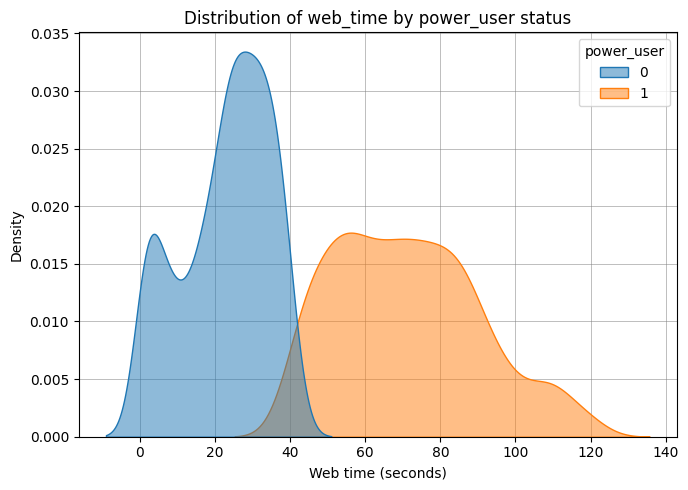

In [7]:
fig, ax = plt.subplots(figsize=(7, 5))

# Plot KDEs of web_time for each power_user group (0 vs 1)
sns.kdeplot(
    data=ecom,
    x="web_time",
    hue="power_user",
    fill=True,
    common_norm=False,
    alpha=0.5,
    ax=ax,
)

ax.set(
    xlabel="Web time (seconds)",
    ylabel="Density",
    title="Distribution of web_time by power_user status",
)
ax.grid(True, alpha=0.6, linewidth=0.6, color="grey")
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()

In [8]:
# Filter rows where 'power_user' equals 1 and create a copy to avoid SettingWithCopyWarning
strata_1 = ecom.loc[ecom["power_user"] == 1].copy()

# Assign Block 1 to all rows in the filtered DataFrame
strata_1["Block"] = 1

# Randomly sample 50% of the rows for the treatment group (T), ensuring reproducibility
strata_1_g1 = strata_1.sample(frac=0.5, replace=False, random_state=42).copy()
strata_1_g1["T_C"] = "T"  # Mark sampled rows as treatment group

# Assign the remaining rows to the control group (C) by dropping treatment indices
strata_1_g2 = strata_1.drop(strata_1_g1.index).copy()
strata_1_g2["T_C"] = "C"  # Mark remaining rows as control group

In [9]:
# Filter out rows from 'ecom' DataFrame where 'power_user' equals 1 to create strata_2
strata_2 = ecom.drop(strata_1.index)

# Assign Block 2 to all rows in the filtered DataFrame for stratified analysis
strata_2["Block"] = 2

# Randomly sample 50% of the rows for the treatment group (T), ensuring reproducibility
strata_2_g1 = strata_2.sample(frac=0.5, replace=False, random_state=42).copy()

# Mark sampled rows as treatment group
strata_2_g1["T_C"] = "T"

# Assign the remaining rows to the control group (C) by dropping treatment indices
strata_2_g2 = strata_2.drop(strata_2_g1.index).copy()

# Mark remaining rows as control group
strata_2_g2["T_C"] = "C"

In [10]:
# Combine all stratified groups into a single DataFrame for analysis
ecom_stratified = pd.concat([strata_1_g1, strata_1_g2, strata_2_g1, strata_2_g2])

# Group by Block, Treatment/Control (T_C), and power_user, then count occurrences
# This provides a summary of the distribution of users across strata and groups
display(ecom_stratified.groupby(["Block", "T_C", "power_user"]).size())

Block  T_C  power_user
1      C    1             339
       T    1             340
2      C    0             161
       T    0             160
dtype: int64

In [11]:
url = "https://raw.githubusercontent.com/jhlopesalves/data-science-practice-notebook/refs/heads/main/Python/statistics/experimental_design/data/productivity_subjects.csv"
productivity_subjects = pd.read_csv(
    url, usecols=lambda col: not col.startswith("Unnamed")
)
productivity_subjects.head()

,subject_id
0,1
1,2
2,3
3,4
4,5


### Blocking experimental data
You are working with a manufacturing firm that wants to conduct some experiments on worker productivity. Their dataset only contains 100 rows, so it's important that experimental groups are balanced.

This sounds like a great opportunity to use your knowledge of blocking to assist them. They have provided a `productivity_subjects` DataFrame. Split the provided dataset into two even groups of 50 entries each.

In [12]:
block_1 = productivity_subjects.sample(frac=0.5, random_state=42, replace=False)
block_1["block"] = 1

block_2 = productivity_subjects.drop(block_1.index)
block_2["block"] = 2
productivity_combined = pd.concat([block_1, block_2], axis=0)
display(productivity_combined["block"].value_counts())

block
1    50
2    50
Name: count, dtype: int64

In [13]:
url = "https://raw.githubusercontent.com/jhlopesalves/data-science-practice-notebook/refs/heads/main/Python/statistics/experimental_design/data/wealth_data.csv"
wealth_data = pd.read_csv(url, usecols=lambda col: not col.startswith("Unnamed"))

In [14]:
# Create the first block (use .copy() and .loc to avoid SettingWithCopyWarning)
strata_1 = wealth_data[wealth_data["high_wealth"] == 1].copy()
strata_1.loc[:, "Block"] = 1

# Create two groups assigning to Treatment or Control
strata_1_g1 = strata_1.sample(n=100, random_state=42, replace=False).copy()
strata_1_g1.loc[:, "T_C"] = "T"

strata_1_g2 = strata_1.drop(strata_1_g1.index).copy()
strata_1_g2.loc[:, "T_C"] = "C"

In [15]:
strata_2 = wealth_data[wealth_data["high_wealth"] == 0].copy()
strata_1.loc[:, "Block"] = 2

strata_2_g1 = strata_2.sample(n=900, random_state=42, replace=False).copy()
strata_2_g1.loc[:, "T_C"] = "T"

strata_2_g2 = strata_2.drop(strata_2_g1.index).copy()
strata_2_g2.loc[:, "T_C"] = "C"

In [16]:
# Concatenate the grouping work
wealth_data_stratified = pd.concat([strata_1_g1, strata_1_g2, strata_2_g1, strata_2_g2])
display(wealth_data_stratified.groupby(["Block", "T_C", "high_wealth"]).size())

Block  T_C  high_wealth
1.0    C    1              100
       T    1              100
dtype: int64

## The Normality Assumption

Parametric tests are mathematically derived based on the assumption that the sample data follows a specific distribution, most commonly the **normal distribution**. The normal distribution is the familiar "bell curve" shape, defined by its mean ($\mu$) and standard deviation ($\sigma$).

If this assumption is significantly violated, the p-values and confidence intervals produced by parametric tests may be unreliable. Therefore, it is a crucial step in your analysis to check if your data is consistent with this assumption. If it is not, non-parametric alternatives should be considered.

### Visual Methods for Assessing Normality

Before running a formal test, it is always best practice to visualize the distribution of your data.

#### Histogram and Kernel Density Estimate (KDE)

A simple histogram or a smoothed KDE plot provides a quick, qualitative sense of the data's distribution. If the plot is roughly symmetric and bell-shaped, the normality assumption may be reasonable.

```python
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create a sample of normally distributed data
np.random.seed(42)
normal_data = pd.DataFrame({'value': np.random.normal(loc=100, scale=10, size=100)})

# Visualize with a KDE plot
sns.displot(data=normal_data, x='value', kind="kde")
plt.title("KDE Plot of Normally Distributed Data")
plt.show()
```

#### Q-Q (Quantile-Quantile) Plot

A Q-Q plot is a more rigorous visual tool. It compares the quantiles of your sample data against the theoretical quantiles of a perfect normal distribution.

  * **What a "Good" Plot Looks Like**: If the data is normally distributed, the points on the Q-Q plot will fall closely along the straight diagonal reference line.
  * **What a "Bad" Plot Looks Like**: Systematic deviations from the line, such as an S-shape or the points bowing out at the ends, indicate a departure from normality.

```python
from statsmodels.graphics.gofplots import qqplot

# Create a Q-Q plot
qqplot(normal_data['value'], line='s') # 's' for a standardized line
plt.title("Q-Q Plot of Normally Distributed Data")
plt.show()
```

### Formal Hypothesis Tests for Normality

While visual checks are essential, formal hypothesis tests provide a quantitative measure of how likely it is that the data was drawn from a normal population. For these tests, the hypotheses are:

  * **Null Hypothesis ($H_0$)**: The sample data is drawn from a normally distributed population.
  * **Alternative Hypothesis ($H_A$)**: The sample data is *not* drawn from a normally distributed population.

Note that for these tests, we are often *hoping to fail to reject the null hypothesis*, as this would support our assumption of normality.

#### Shapiro-Wilk Test

The Shapiro-Wilk test is a powerful test for normality, particularly for smaller datasets.

  * **Interpretation**: The function returns a test statistic and a p-value. If the **p-value is greater than** your chosen significance level (e.g., `p > 0.05`), you fail to reject $H_0$ and can assume the data is normal.

#### Anderson-Darling Test

The Anderson-Darling test is another powerful test that is particularly sensitive to deviations in the tails of the distribution.

  * **Interpretation**: Its output is different. Instead of a p-value, it returns a test statistic and an array of critical values corresponding to different significance levels. If the **test statistic is less than** the critical value for your chosen significance level, you fail to reject $H_0$.


### A Complete Example: Normal vs. Non-Normal Data

Let's compare the diagnostic outputs for a normal dataset and a non-normal (exponential) dataset.

```python
from scipy.stats import shapiro, anderson

# Create a non-normal (exponential) dataset for comparison
non_normal_data = pd.DataFrame({'value': np.random.exponential(scale=10, size=100)})

# 1. Shapiro-Wilk Test 
alpha = 0.05
stat_norm, p_norm = shapiro(normal_data['value'])
print(f"Normal Data: p-value = {p_norm:.4f}")
if p_norm > alpha:
    print("  -> Fail to reject H0: The data is likely normal.\n")
else:
    print("  -> Reject H0: The data is likely not normal.\n")

stat_non_norm, p_non_norm = shapiro(non_normal_data['value'])
print(f"Non-Normal Data: p-value = {p_non_norm:.4f}")
if p_non_norm > alpha:
    print("  -> Fail to reject H0: The data is likely normal.")
else:
    print("  -> Reject H0: The data is likely not normal.")


# 2. Anderson-Darling Test 
result_norm = anderson(normal_data['value'], dist='norm')
print(f"Normal Data: Statistic = {result_norm.statistic:.4f}")
# Compare statistic to critical value at 5% significance
if result_norm.statistic < result_norm.critical_values[2]:
    print(f"  -> Fail to reject H0 at 5% significance level.\n")
else:
    print(f"  -> Reject H0 at 5% significance level.\n")

result_non_norm = anderson(non_normal_data['value'], dist='norm')
print(f"Non-Normal Data: Statistic = {result_non_norm.statistic:.4f}")
if result_non_norm.statistic < result_non_norm.critical_values[2]:
    print(f"  -> Fail to reject H0 at 5% significance level.")
else:
    print(f"  -> Reject H0 at 5% significance level.")
```

The tests correctly fail to reject the null hypothesis for the normal data and reject it for the non-normal data, demonstrating how to use these formal checks to validate the normality assumption.

In [17]:
url = "https://raw.githubusercontent.com/jhlopesalves/data-science-practice-notebook/refs/heads/main/Python/statistics/experimental_design/data/salaries.csv"
salaries = pd.read_csv(url, usecols=lambda col: not col.startswith("Unnamed"))
salaries.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


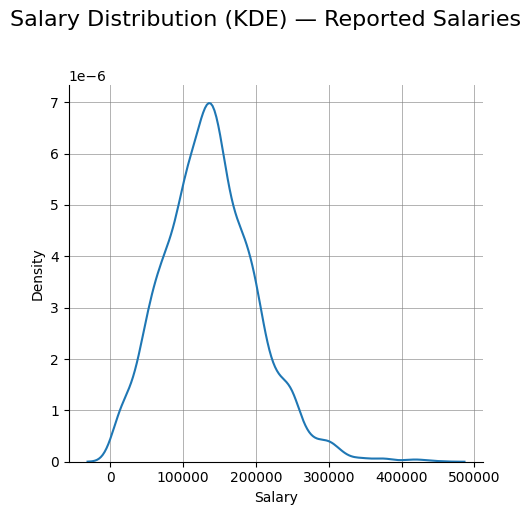

In [18]:
# Create the KDE plot
g = sns.displot(salaries, x="salary_in_usd", kind="kde")

# Add a meaningful title
g.fig.suptitle("Salary Distribution (KDE) — Reported Salaries", fontsize=16, y=1.02)

# Access the axes and customize
for ax in g.axes.flat:
    ax.set_xlabel("Salary")
    ax.set_ylabel("Density")
    ax.grid(True, alpha=0.6, linewidth=0.7, color="grey")

plt.tight_layout()
plt.show()

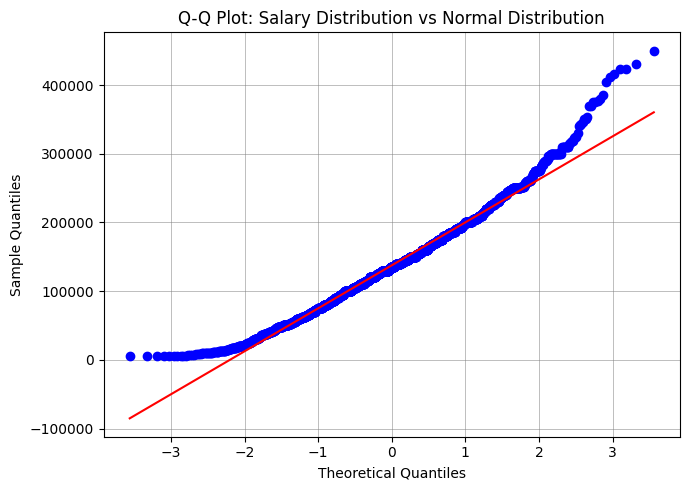

In [19]:
from scipy.stats import probplot

# Create Q-Q plot using seaborn style
fig, ax = plt.subplots(figsize=(7, 5))
probplot(salaries["salary_in_usd"], dist="norm", plot=ax)

# Customize the plot with seaborn styling
ax.set(
    title="Q-Q Plot: Salary Distribution vs Normal Distribution",
    xlabel="Theoretical Quantiles",
    ylabel="Sample Quantiles",
)
ax.grid(True, alpha=0.6, linewidth=0.6, color="grey")

plt.tight_layout()
plt.show()

In [20]:
from scipy.stats import shapiro

alpha = 0.05

stat, p = shapiro(salaries["salary_in_usd"])
print(f"p: {p:.3e} test stat: {round(stat, 4)}")

p: 5.132e-21 test stat: 0.9827


In [21]:
from scipy.stats import anderson

result = anderson(x=salaries["salary_in_usd"], dist="norm")

print("Anderson-Darling Test Results for Salary Distribution:")
print(f"{'='*50}")
print(f"Test Statistic: {result.statistic:.4f}")
print(f"Critical Values: {result.critical_values}")
print(f"Significance Levels (%): {result.significance_level}")
print(f"Fit Success: {result.fit_result.success}")

Anderson-Darling Test Results for Salary Distribution:
Test Statistic: 7.8391
Critical Values: [0.575 0.655 0.786 0.917 1.091]
Significance Levels (%): [15.  10.   5.   2.5  1. ]
Fit Success: True


In [22]:
from pingouin import normality

# Anderson-Darling test using pingouin
result_pg = normality(salaries["salary_in_usd"], method="normaltest")
display(result_pg)

,W,pval,normal
salary_in_usd,216.575884,9.357164e-48,False


In [23]:
url = "https://assets.datacamp.com/production/repositories/6639/datasets/271cc99d1f93fbfb2c3762f6517c58b22eb390ce/chick_weight.csv"
chicken_data = pd.read_csv(url, usecols=lambda col: not col.startswith("Unnamed"))
chicken_data.head()

,weight,Time,Chick,Diet
0,42,0,1,1
1,51,2,1,1
2,59,4,1,1
3,64,6,1,1
4,76,8,1,1


In [24]:
columns = chicken_data.columns.to_list()
for col in columns:
    print(f"The {col} column contains {len(chicken_data[col].unique())} unique values")

The weight column contains 212 unique values
The Time column contains 12 unique values
The Chick column contains 50 unique values
The Diet column contains 4 unique values


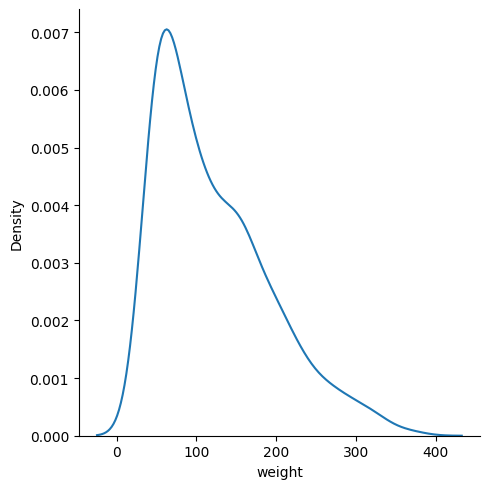

In [25]:
# Plot the distribution of the chickens' weight
sns.displot(data=chicken_data, x="weight", kind="kde")
plt.show()

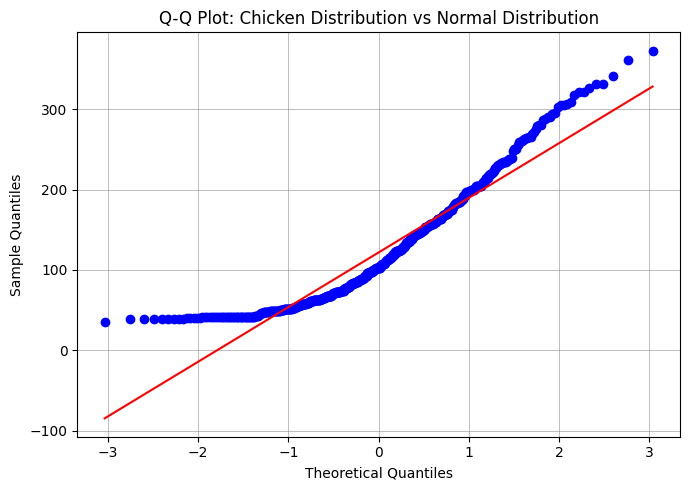

In [26]:
# Plot the qq plot of the chickens' weight
from scipy.stats import probplot

fig, ax = plt.subplots(figsize=(7, 5))

probplot(x=chicken_data["weight"], dist="norm", plot=ax)

ax.set(
    title="Q-Q Plot: Chicken Distribution vs Normal Distribution",
    xlabel="Theoretical Quantiles",
    ylabel="Sample Quantiles",
)
ax.grid(True, alpha=0.6, linewidth=0.6, color="grey")

plt.tight_layout()
plt.show()

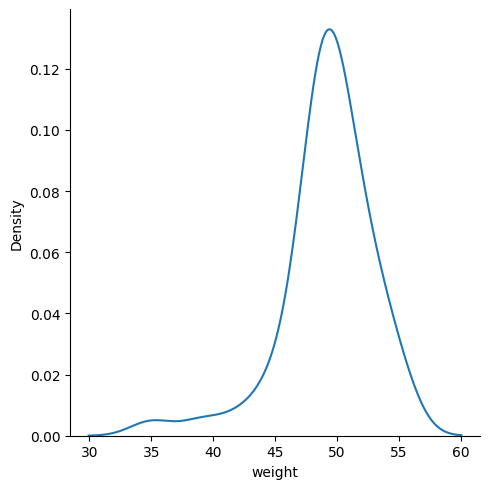

In [27]:
# Subset the data and plot the weight of the subset
subset_data = chicken_data[chicken_data["Time"] == 2]

sns.displot(data=subset_data, x="weight", kind="kde")
plt.show()

In [28]:
# Run a Shapiro-Wilk normality test on the weight column
from scipy.stats import shapiro

stat, p = shapiro(chicken_data["weight"])

print(f"p: {p:.3e} test stat: {round(stat, 4)}")

p: 3.874e-18 test stat: 0.9087


In [29]:
from scipy.stats import anderson

# Run the Anderson-Darling test
result = anderson(chicken_data["weight"], dist="norm")

print(f"Test statistic: {round(result.statistic, 4)}")
print(f"Significance Levels: {result.significance_level}")
print(f"Critical Values: {result.critical_values}")

Test statistic: 14.6868
Significance Levels: [15.  10.   5.   2.5  1. ]
Critical Values: [0.572 0.652 0.782 0.912 1.085]


In [30]:
from pingouin import normality

normality(data=chicken_data["weight"], method="normaltest")

,W,pval,normal
weight,69.337935,8.779275e-16,False


## Understanding Factorial Designs

In many experiments, an outcome is influenced by more than one factor. A factorial design is an efficient and powerful way to investigate these complex scenarios.

  * **Factors and Levels**: A **factor** is an independent variable (or categorical variable) that you are testing. A **level** is a specific value of that factor. For example, in an agricultural experiment, `Fertilizer_Type` could be a factor with two levels: `Organic` and `Synthetic`. `Light_Condition` could be a second factor with two levels: `Full Sunlight` and `Partial Shade`. An experiment with these two factors would be a **2x2 factorial design**, resulting in 2 x 2 = 4 unique experimental conditions.

  * **Key Advantages**:

    1.  **Efficiency**: It allows you to study multiple factors and their effects in a single experiment, which is more economical than running separate single-factor experiments.
    2.  **Interaction Effects**: Most importantly, it is the only design that allows you to discover **interactions** between factors.

### Main Effects vs. Interaction Effects

A factorial design allows you to measure two types of effects:

  * **Main Effect**: The overall effect of a single factor on the response variable, averaged across the levels of all other factors. For example, "What is the overall effect of `Fertilizer_Type` on plant growth, regardless of the `Light_Condition`?"

  * **Interaction Effect**: An interaction occurs when the effect of one factor on the response variable **depends on the level of another factor**. This is a critical concept. For example, an interaction exists if organic fertilizer works best in full sunlight, but synthetic fertilizer works best in partial shade. If a significant interaction is present, the factors do not work independently, and interpreting the main effects in isolation can be misleading.

### Implementation and Analysis in Python

Analyzing a factorial design involves first visualizing the results and then performing a statistical test.

#### 1. Visualizing Interactions

A **heatmap** is an excellent tool for visualizing the results of a factorial experiment and spotting potential interactions. The first step is to organize the data into a grid of mean outcomes for each combination of factor levels. This is easily done with a `pandas.pivot_table`.

  * **How to Interpret the Heatmap**: You look for a "non-parallel" pattern. If the color pattern in one row is different from the pattern in another row, it suggests an interaction. For example, if for `Full Sunlight` the `Organic` cell is "hotter" (higher value) than `Synthetic`, but for `Partial Shade` the `Synthetic` cell is hotter, this reversal indicates a strong interaction.

#### 2. Statistical Analysis (ANOVA)

The standard statistical method for analyzing a factorial design is a **two-way Analysis of Variance (ANOVA)**. The model formula in `statsmodels` is structured to test for both main effects and the interaction effect:

`response ~ factor1 + factor2 + factor1:factor2`

The p-value for the `factor1:factor2` interaction term is the key result. A significant p-value confirms that the effect of one factor is dependent on the level of the other.

### A Complete Example

**Scenario**: We want to study the effect of `Light_Condition` ('High', 'Low') and `Nutrient_Type` ('A', 'B') on plant `Growth_cm`.

```python
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Create a generic, reproducible dataset for a 2x2 factorial design
# We will intentionally create an interaction effect.
np.random.seed(42)
data = {
    'Light_Condition': np.random.choice(['High', 'Low'], 200),
    'Nutrient_Type': np.random.choice(['A', 'B'], 200)
}
df = pd.DataFrame(data)

# Define the effects
base_growth = 20
# Main effects
light_effect = {'High': 5, 'Low': -5}
nutrient_effect = {'A': 2, 'B': -2}
# Interaction effect: Nutrient A is MUCH better in High light
interaction_effect = {('High', 'A'): 8, ('High', 'B'): 0, ('Low', 'A'): 0, ('Low', 'B'): 3}

df['Growth_cm'] = base_growth + \
                  df['Light_Condition'].map(light_effect) + \
                  df['Nutrient_Type'].map(nutrient_effect) + \
                  df.apply(lambda row: interaction_effect[(row['Light_Condition'], row['Nutrient_Type'])], axis=1) + \
                  np.random.normal(0, 2, 200)

# 2. Organize the data to visualize the interaction
# Create a pivot table of the mean growth for each condition
pivot = pd.pivot_table(df, values='Growth_cm', index='Light_Condition',
                       columns='Nutrient_Type', aggfunc='mean')

print(pivot)

# 3. Visualize the interaction with a heatmap
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(pivot, annot=True, cmap='viridis', fmt='.2f', ax=ax, cbar_kws={'label': 'Mean Growth (cm)'})
ax.set_title("Interaction between Light Condition and Nutrient Type")
ax.set_xlabel("Nutrient Type")
ax.set_ylabel("Light Condition")
plt.tight_layout()
plt.show()
```

**Interpretation of the Heatmap**:
The heatmap visually reveals the strong interaction effect we created. In the 'High' light condition, `Nutrient_Type` 'A' is clearly superior to 'B' (34.90 vs. 22.99). However, in the 'Low' light condition, this effect reverses, and 'B' is slightly better than 'A' (16.03 vs. 13.06). Because the effect of `Nutrient_Type` is different depending on the `Light_Condition`, we can conclude that a significant interaction is present.

In [31]:
url = "https://assets.datacamp.com/production/repositories/6639/datasets/7cb2f98d6252b3fccdb870bc4f05815d4df71c20/marketing_data.feather"
marketing_data = pd.read_feather(url)
marketing_data.head()

,Messaging_Style,Time_of_Day,Click_Through_Rate,Conversions
0,Casual,Morning,0.640465,500
1,Formal,Evening,0.698533,598
2,Casual,Morning,0.257834,234
3,Casual,Evening,0.922971,602
4,Casual,Morning,0.476893,314


In [32]:
# Create a pivot table with 'Messaging_Style' as the index and 'Time_of_Day' as the columns, computing the mean of Conversions.
marketing_pivot = marketing_data.pivot_table(
    values="Conversions",
    index="Messaging_Style",
    columns="Time_of_Day",
    aggfunc="mean",
)

display(marketing_pivot)

Time_of_Day,Evening,Morning
Messaging_Style,,
Casual,402.329004,401.133891
Formal,432.913043,411.096000


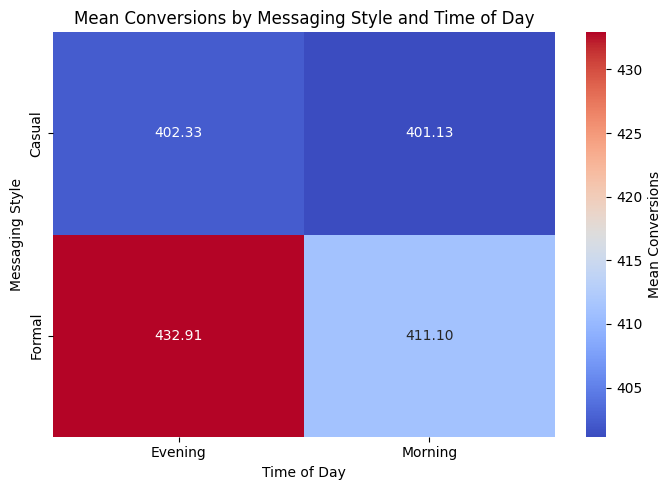

In [33]:
# Visualize interactions between Messaging_Style and Time_of_Day with respect to conversions by creating an annotated cool-warm heatmap of marketing_pivot.
fig, ax = plt.subplots(figsize=(7, 5))

sns.heatmap(
    marketing_pivot,
    cmap="coolwarm",
    fmt=".2f",
    ax=ax,
    annot=True,
    cbar_kws={"label": "Mean Conversions"},
)
ax.set(
    xlabel="Time of Day",
    ylabel="Messaging Style",
    title="Mean Conversions by Messaging Style and Time of Day",
)

plt.tight_layout()
plt.show()

### The Problem: Controlling Unwanted Variance

In many experiments, we know that certain baseline characteristics of our subjects can significantly influence the outcome, regardless of the treatment they receive. For example, when testing new training programs, an athlete's initial fitness level will likely have a large impact on their muscle gain.

This pre-existing variability among subjects can act as "noise" in our experiment. If this noise is large, it can obscure the true, potentially smaller, effect of the treatments, making it difficult to achieve statistically significant results. A randomized block design is a powerful technique to address this problem.


### The Solution: Randomized Block Design

The core idea is to isolate a known source of variability and remove its effect from the analysis of the treatment.

  * **Blocking**: First, you group subjects into homogeneous **blocks** based on a key covariate that you believe will affect the outcome. For example, you could block athletes by `Initial_Fitness_Level` (`Beginner`, `Intermediate`, `Advanced`). All subjects within a block should be as similar as possible with respect to this variable.

  * **Randomization within Blocks**: Second, you perform a separate randomization **within each block** to assign subjects to the different treatment groups. This ensures that each treatment is tested on a balanced set of subjects from each fitness level.

The advantage of this design is that it allows you to statistically control for the variability *between* the blocks, providing a clearer and more precise estimate of the treatment's true effect.

### Implementation and Analysis in Python

Let's walk through an example of setting up and analyzing a randomized block experiment.

**Scenario**: We want to test three different training `Treatments` ('Cardio', 'Mixed', 'Strength Training') on athlete `Muscle_Gain_kg`. We know that `Initial_Fitness_Level` is a major factor, so we use it as our blocking variable.

```python
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

# 1. Create a generic, reproducible dataset
np.random.seed(42)
fitness_levels = ['Beginner', 'Intermediate', 'Advanced']
df = pd.DataFrame({
    'Initial_Fitness_Level': np.random.choice(fitness_levels, 300, p=[0.3, 0.4, 0.3]),
    'Athlete_ID': np.arange(300)
})

# Simulate a base muscle gain dependent on the blocking variable
fitness_effect = {'Beginner': 5.0, 'Intermediate': 4.5, 'Advanced': 4.0}
df['Muscle_Gain_kg'] = df['Initial_Fitness_Level'].map(fitness_effect) + np.random.normal(0, 1, 300)

# 2. Implement Randomized Block Assignment
# For each block (fitness level), we will shuffle and assign the three treatments.
treatments = ['Cardio', 'Mixed', 'Strength Training']
# Ensure each block has a size divisible by the number of treatments
df_blocked = df.groupby('Initial_Fitness_Level').apply(
    lambda x: x.assign(Treatment=np.random.permutation(treatments * (len(x) // len(treatments))))
).reset_index(drop=True)

# 3. Visualize the Results
# Visualize treatment effects within each block
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x='Initial_Fitness_Level', y='Muscle_Gain_kg', hue='Treatment', data=df_blocked, ax=ax)
ax.set_title('Treatment Effect on Muscle Gain within each Fitness Block')
plt.show()
```

The boxplot allows us to visually inspect the effect of the different treatments for each fitness level separately.

#### Statistical Analysis

We can now perform two separate ANOVA tests to answer two different questions.

**1. Is there a significant effect of the blocking variable?**
This test validates our decision to use `Initial_Fitness_Level` as a block. If there is no significant difference in muscle gain between the levels, then blocking was not necessary.

```python
# ANOVA between the blocks
F_stat_blocks, p_val_blocks = f_oneway(
    df_blocked[df_blocked['Initial_Fitness_Level'] == "Advanced"]['Muscle_Gain_kg'],
    df_blocked[df_blocked['Initial_Fitness_Level'] == "Beginner"]['Muscle_Gain_kg'],
    df_blocked[df_blocked['Initial_Fitness_Level'] == "Intermediate"]['Muscle_Gain_kg']
)

print(f"P-value for difference between fitness levels: {p_val_blocks:.4f}")
```

A significant p-value here confirms that the blocking variable has a strong effect on the outcome and that the blocking design was a good choice.

**2. Is there a significant treatment effect *within* the blocks?**
This is the primary question of our experiment. We can perform an ANOVA within each block to see if the treatments had a differential effect.

```python
# ANOVA within each block
within_block_anova = df_blocked.groupby('Initial_Fitness_Level').apply(
    lambda x: f_oneway(
        x[x['Treatment'] == 'Cardio']['Muscle_Gain_kg'],
        x[x['Treatment'] == 'Mixed']['Muscle_Gain_kg'],
        x[x['Treatment'] == 'Strength Training']['Muscle_Gain_kg']
    )
)

# The second element of each result is the p-value
print(within_block_anova.apply(lambda x: x[1]))
```

By looking at the p-values for each block, we can assess if the treatments had a significant effect for beginners, intermediates, or advanced athletes, having controlled for the initial differences between these groups.

In [34]:
url = "https://raw.githubusercontent.com/jhlopesalves/data-science-practice-notebook/refs/heads/main/Python/statistics/experimental_design/data/productivity.csv"
productivity = pd.read_csv(url, usecols=lambda col: not col.startswith("Unnamed"))
productivity.head()

,subject_id,productivity_score,block
0,1,11.9,2.0
1,2,28.6,3.0
2,3,22.2,3.0
3,4,18.4,2.0
4,5,5.5,1.0


### Implementing a randomized block design
The manufacturing firm you worked with earlier is still interested in conducting some experiments on worker productivity. Previously, the two blocks were set randomly. While this can work, it can be better to group subjects based on similar characteristics.

The same employees are again loaded but this time in a DataFrame called `productivity` including 1200 other colleagues. It also includes a worker `'productivity_score'` column based on units produced per hour. This column was binned into three groups to generate blocks based on similar productivity values. The firm would like to apply a new incentive program with three options (`'Bonus'`, `'Profit Sharing'` and `'Work from Home'`) throughout the firm with treatment applied randomly.

In [35]:
prod_df = productivity.groupby("block").sample(frac=1)
prod_df = prod_df.reset_index(drop=True)

prod_df["Treatment"] = np.random.choice(
    ["Bonus", "Profit Sharing", "Work from Home"], size=len(prod_df)
)

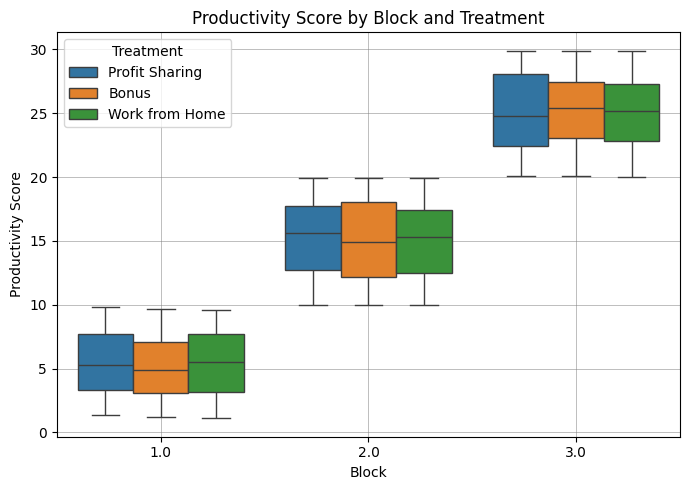

In [36]:
fig, ax = plt.subplots(figsize=(7, 5))

# Make a plot showing how productivity_score varies within blocks
sns.boxplot(x="block", y="productivity_score", hue="Treatment", data=prod_df)
ax.set(
    xlabel="Block",
    ylabel="Productivity Score",
    title="Productivity Score by Block and Treatment",
)

ax.grid(True, alpha=0.6, linewidth=0.6, color="grey")

plt.tight_layout()
plt.show()

In [37]:
import warnings

from scipy.stats import f_oneway

# Suppress warnings for this operation
with warnings.catch_warnings():
    warnings.simplefilter("ignore")

    # Perform the within blocks ANOVA, first grouping by block
    within_block_anova = prod_df.groupby("block").apply(
        # Set function
        lambda x: f_oneway(
            # Filter Treatment values based on outcome
            x[x["Treatment"] == "Bonus"]["productivity_score"],
            x[x["Treatment"] == "Profit Sharing"]["productivity_score"],
            x[x["Treatment"] == "Work from Home"]["productivity_score"],
        )
    )
print(within_block_anova)

block
1.0     (0.7343273652829021, 0.4804535167586427)
2.0    (0.18877107168657498, 0.8280435121236055)
3.0     (0.3271305735162972, 0.7211647975572033)
dtype: object


In [38]:
# This cell was empty before. It now summarizes the within-block ANOVA results
# created in the previous cell (within_block_anova) so that executing it renders output.
import pandas as pd

# Guard in case the previous cell wasn't run yet
try:
    within_block_results = within_block_anova.apply(
        lambda x: {"F_stat": x[0], "p_value": x[1]}
    ).apply(pd.Series)
    # Add a decision column at alpha = 0.05
    alpha = 0.05
    within_block_results["reject_H0"] = within_block_results["p_value"] < alpha
    display(within_block_results)
except NameError:
    print("within_block_anova is not defined yet. Run the previous cell first.")

,F_stat,p_value,reject_H0
block,,,
1.0,0.734327,0.480454,False
2.0,0.188771,0.828044,False
3.0,0.327131,0.721165,False


### The Role of Covariates in Experimental Design

#### What is a Covariate?

A **covariate** is a variable that is not the primary focus of the experiment but has the potential to affect the outcome (the dependent variable). It is a baseline characteristic of the subjects that is measured before the treatment is applied. For example, in an experiment testing the impact of a new teaching method on test scores, a student's `prior_knowledge` would be a crucial covariate.

#### Why are Covariates Important?

Accounting for covariates is important for two main reasons:

1.  **Reducing Confounding**: Even with random assignment, it is possible for a key covariate to be imbalanced between the treatment and control groups by chance. If this happens, the covariate can become a **confounding variable**, making it difficult to determine if an observed effect is due to the treatment or the pre-existing group imbalance.
2.  **Increasing Precision and Power**: Covariates often explain a significant portion of the natural variability in the outcome. By statistically controlling for this variability, we reduce the "noise" (unexplained error) in the experiment. This makes it easier to detect the "signal" of the treatment effect, thereby increasing the statistical power and precision of our results.

### Covariate Adjustment using ANCOVA

**Analysis of Covariance (ANCOVA)** is a statistical model that blends ANOVA and linear regression. It is used to compare the means of groups while statistically controlling for the effects of one or more continuous covariates.

In practice, ANCOVA is implemented as a multiple linear regression model. The model formula includes terms for the categorical treatment variable as well as the continuous covariate(s). For a simple experiment with one treatment factor and one covariate, the `statsmodels` formula is:

`response ~ treatment_group + covariate`

This model estimates the effect of the `treatment_group` *after* having accounted for the variation in the `response` that is explained by the `covariate`.

### A Complete Example

**Scenario**: A company runs an A/B test on a new website design ('New Design' vs. 'Old Design'). The goal is to see if the new design increases the `purchase_amount`. The company knows that a user's `prior_engagement` score is a strong predictor of their spending.

#### 1. Analysis Without Covariate Adjustment (t-test)

First, let's analyze the results with a simple t-test, ignoring the covariate.

```python
import pandas as pd
import numpy as np
import pingouin
import statsmodels.formula.api as smf

# 1. Create a generic, reproducible dataset
np.random.seed(42)
n_subjects = 200
df = pd.DataFrame({
    'treatment': np.random.choice(['New Design', 'Old Design'], n_subjects),
    # A strong covariate that influences the outcome
    'prior_engagement': np.random.uniform(10, 100, n_subjects)
})
# The outcome depends on the treatment AND the strong covariate
treatment_effect = df['treatment'].apply(lambda x: 15 if x == 'New Design' else 0)
df['purchase_amount'] = 50 + treatment_effect + (0.5 * df['prior_engagement']) + np.random.normal(0, 10, n_subjects)

# 2. Analyze using a t-test (ignores the covariate) 
ttest_results = pingouin.ttest(
    data=df,
    dv='purchase_amount',
    between='treatment'
)
print(ttest_results)
```

#### 2. Analysis With Covariate Adjustment (ANCOVA)

Now, let's re-analyze the data using an ANCOVA model that includes the `prior_engagement` covariate.

```python
# 3. Analyze using ANCOVA (controlling for the covariate) 
# Note: statsmodels will automatically use the first category ('New Design') as the reference
# To make 'Old Design' the reference, we can reorder the category
df['treatment'] = pd.Categorical(df['treatment'], categories=['Old Design', 'New Design'], ordered=True)

ancova_model = smf.ols("purchase_amount ~ treatment + prior_engagement", data=df).fit()

print(ancova_model.summary())
```

#### Interpretation and Comparison

The ANCOVA summary provides a richer and more precise analysis. Let's focus on the coefficient for the treatment:

`treatment[T.New Design]     14.86     ...     0.000`

  * **Coefficient (14.86)**: This is the **adjusted effect** of the treatment. It is the estimated increase in `purchase_amount` for the 'New Design' group, holding `prior_engagement` constant. This value is a more accurate estimate of the true treatment effect than the simple difference in means from the t-test.
  * **P-value (`P>|t|` is 0.000)**: The p-value for the treatment effect is highly significant. By controlling for the "noise" created by `prior_engagement`, the ANCOVA model has more statistical power and is better able to detect the true effect of the new design. The t-test, which did not account for this noise, may have produced a larger, less significant p-value.

By including important covariates in your analysis, you can achieve a more precise, powerful, and valid assessment of your experimental results.

In [39]:
url = "https://assets.datacamp.com/production/repositories/6639/datasets/271cc99d1f93fbfb2c3762f6517c58b22eb390ce/chick_weight.csv"
chick_data = pd.read_csv(url, usecols=lambda col: not col.startswith("Unnamed"))
chick_data.head()

,weight,Time,Chick,Diet
0,42,0,1,1
1,51,2,1,1
2,59,4,1,1
3,64,6,1,1
4,76,8,1,1


In [40]:
exp_chick_data = chick_data[["Chick", "Diet", "weight"]].copy()
cov_chick_data = chick_data[["Chick", "Time"]].copy()

In [41]:
from statsmodels.formula.api import ols

# Join the experimental and covariate data based on common column(s), and print this merged data
merged_chick_data = pd.merge(exp_chick_data, cov_chick_data, on="Chick")

# Produce an ANCOVA predicting 'weight' based on 'Diet' and 'Time'
model = ols("weight ~ Diet + Time", data=merged_chick_data).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 weight   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     140.9
Date:                Tue, 02 Sep 2025   Prob (F-statistic):           1.12e-60
Time:                        11:09:45   Log-Likelihood:                -38608.
No. Observations:                6818   AIC:                         7.722e+04
Df Residuals:                    6815   BIC:                         7.724e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     94.0678      2.275     41.342      0.0

In [42]:
merged_chick_data["Diet"] = merged_chick_data["Diet"].astype("category")

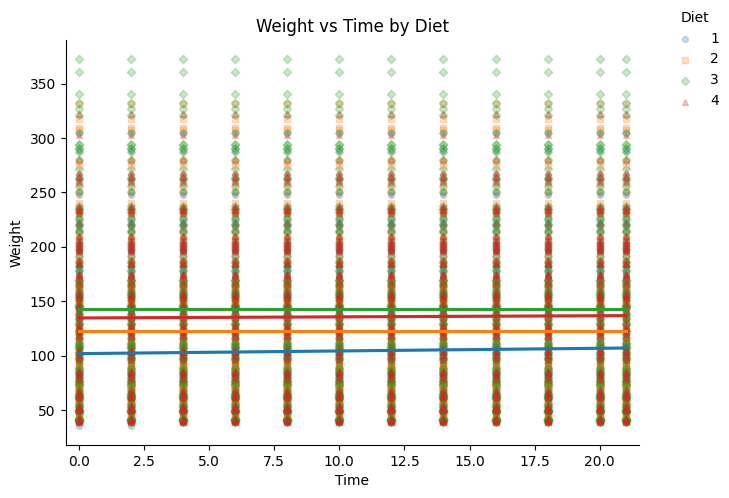

In [43]:
g = sns.lmplot(
    x="Time",
    y="weight",
    hue="Diet",
    data=merged_chick_data,
    ci=None,
    height=5,
    aspect=1.2,
    scatter_kws={"s": 18, "alpha": 0.25},
    markers=["o", "s", "D", "^"],
    legend=True,
)
ax = g.ax
ax.set_xlabel("Time")
ax.set_ylabel("Weight")
ax.set_title("Weight vs Time by Diet")
ax.set_xlim(
    merged_chick_data["Time"].min() - 0.5, merged_chick_data["Time"].max() + 0.5
)

# lmplot returns a FacetGrid; its legend is attached to the FacetGrid (g._legend),
# not directly to the returned axis. Move the FacetGrid legend if present.
if hasattr(g, "_legend") and g._legend is not None:
    g._legend.set_bbox_to_anchor((1, 1))
    g._legend.set_loc("upper left")

plt.tight_layout()
plt.show()

### A Framework for Selecting a Statistical Test

Selecting the appropriate statistical test is a critical step that ensures the validity and reliability of your conclusions. The choice is guided by the structure of your data and your research question. Before choosing a test, you should answer the following:

1.  **What is my hypothesis?** Am I comparing means, testing for an association between variables, or fitting a predictive model?
2.  **What are the data types of my variables?** Is my dependent (response) variable numeric or categorical? What about my independent (explanatory) variables?
3.  **How many groups am I comparing?** Two, or more than two?
4.  **Do my samples meet the test's assumptions?** For parametric tests like t-tests and ANOVA, this includes checking for normality and equal variances.

The following table maps common analytical goals to their appropriate statistical tests.

| Goal | Response Variable (DV) | Explanatory Variable (IV) | Appropriate Test | `scipy.stats` Function |
| :--- | :--- | :--- | :--- | :--- |
| Compare the mean of **one group** to a hypothesized value | Numeric | N/A | **One-Sample t-test** | `ttest_1samp` |
| Compare the means of **two independent groups** | Numeric | Categorical (2 levels) | **Independent t-test** | `ttest_ind` |
| Compare the means of **two paired/related groups** | Numeric | Categorical (2 levels, paired) | **Paired t-test** | `ttest_rel` |
| Compare the means of **three or more independent groups**| Numeric | Categorical (\>2 levels) | **One-Way ANOVA** | `f_oneway` |
| Test for an association between **two categorical variables**| Categorical | Categorical | **Chi-Square Test of Independence**| `chi2_contingency` |

### Practical Application in Python

Let's apply this framework to a synthetic dataset.

```python
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind, f_oneway, chi2_contingency

# 1. Create a generic, reproducible dataset
np.random.seed(42)
df = pd.DataFrame({
    'program': np.random.choice(['Strength', 'Endurance', 'HIIT'], 300),
    'diet': np.random.choice(['Keto', 'Plant-Based'], 300),
    'performance_increase': np.random.normal(loc=10, scale=2, size=300)
})

# Add a slight effect for demonstration
df.loc[df['program'] == 'Strength', 'performance_increase'] += 1.5
```

#### Scenario 1: Comparing Two Group Means (Independent t-test)

  * **Question**: Is there a statistically significant difference in `performance_increase` between the `Strength` and `Endurance` programs?
  * **Variables**: DV is numeric, IV is categorical with 2 levels.
  * **Test**: Independent t-test.


```python
# Isolate the data for the two groups
group1 = df[df['program'] == 'Strength']['performance_increase']
group2 = df[df['program'] == 'Endurance']['performance_increase']

# Perform the independent t-test
t_stat, p_val_ttest = ttest_ind(group1, group2)

print(f"t-statistic: {t_stat:.4f}, p-value: {p_val_ttest:.4f}")
```

#### Scenario 2: Comparing Three or More Group Means (ANOVA)

  * **Question**: Is there a statistically significant difference in `performance_increase` among the three programs (`Strength`, `Endurance`, `HIIT`)?
  * **Variables**: DV is numeric, IV is categorical with \>2 levels.
  * **Test**: One-Way ANOVA.


```python
# Isolate the data for all three groups
group_strength = df[df['program'] == 'Strength']['performance_increase']
group_endurance = df[df['program'] == 'Endurance']['performance_increase']
group_hiit = df[df['program'] == 'HIIT']['performance_increase']

# Perform the one-way ANOVA
f_stat, p_val_anova = f_oneway(group_strength, group_endurance, group_hiit)

print(f"F-statistic: {f_stat:.4f}, p-value: {p_val_anova:.4f}")
```

#### Scenario 3: Testing for Association Between Categorical Variables

  * **Question**: Is there a statistically significant association between `program` type and `diet` type?
  * **Variables**: DV is categorical, IV is categorical.
  * **Test**: Chi-square test of independence.

<!-- end list -->

```python
# Create a contingency table
contingency_table = pd.crosstab(df['program'], df['diet'])

# Perform the chi-square test
chi2_stat, p_val_chi2, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2_stat:.4f}, p-value: {p_val_chi2:.4f}")
```



In [44]:
url = "https://assets.datacamp.com/production/repositories/6639/datasets/fa31bb093297b26f95481a8bae36437fbdb2f93b/chemical_reactions.csv"
chemical_reactions = pd.read_csv(url, usecols=lambda col: not col.startswith("Unnamed"))
chemical_reactions.head()

,Catalyst,Reaction_Time
0,Palladium,47.483571
1,Palladium,44.308678
2,Palladium,48.238443
3,Palladium,52.615149
4,Palladium,43.829233


### Choosing the right test: petrochemicals
In a chemistry research lab, scientists are examining the efficiency of three well-known catalysts—Palladium (Pd), Platinum (Pt), and Nickel (Ni)—in facilitating a particular reaction. Each catalyst is used in a set of identical reactions under controlled conditions, and the time taken for each reaction to reach completion is meticulously recorded. Your goal is to compare the mean reaction times across the three catalyst groups to identify which catalyst, if any, has a significantly different reaction time.

In [45]:
from scipy.stats import f_oneway

# Use a list comprehension to filter into groups iterating over the catalyst_types and each of their 'Reaction_Time's

catalyst_types = chemical_reactions["Catalyst"].unique().tolist()

# Collect reaction times for each catalyst into a list
groups = [
    chemical_reactions[chemical_reactions["Catalyst"] == catalyst]["Reaction_Time"]
    for catalyst in catalyst_types
]

# Run a one-way ANOVA on the three groups to compare their mean reaction times and print the p-value
f_stat, p_val = f_oneway(*groups)

print(f"P-value: {p_val:.4e}, f-test: {f_stat:.4f}")

P-value: 4.7107e-151, f-test: 478.7413


In [46]:
url = "https://assets.datacamp.com/production/repositories/6639/datasets/33a580fb6b6b303ee02c4ce225a8a9c19d275915/hr_wellness.csv"
hr_wellness = pd.read_csv(url, usecols=lambda col: not col.startswith("Unnamed"))
hr_wellness.head()

,Department,Wellness_Program_Status
0,Marketing,Enrolled
1,Sales,Enrolled
2,Marketing,Not Enrolled
3,Marketing,Not Enrolled
4,Sales,Enrolled


### Choosing the right test: human resources
In human resources, it's essential to understand the relationships between different variables that might influence employee satisfaction or turnover. Consider a scenario where an HR department is interested in understanding the association between the department in which employees work and their participation in a new workplace wellness program. The HR team has compiled this data over the past two years and has asked you if there's any significant association between an employee's department and their enrolling in the wellness program.

In [47]:
# Create a contingency table comparing 'Department' and 'Wellness_Program_Status'
contingency_table = pd.crosstab(
    hr_wellness["Department"], hr_wellness["Wellness_Program_Status"]
)
display(contingency_table)

Wellness_Program_Status,Enrolled,Not Enrolled
Department,,
Engineering,279,187
Marketing,276,186
Sales,269,223


In [48]:
from scipy.stats import chi2_contingency

# Perform the chi-square test of association
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

# Summary table with scalar results
hr_wellness_chi2 = pd.DataFrame(
    [{"Chi-square": chi2_stat, "P-value": p_val, "DOF": dof}]
)

# Expected counts as a separate DataFrame with same index/columns as the contingency table
expected_df = pd.DataFrame(
    expected, index=contingency_table.index, columns=contingency_table.columns
)

display(hr_wellness_chi2)
print("Expected counts under the null hypothesis:")
display(expected_df)

,Chi-square,P-value,DOF
0,3.477574,0.175733,2


Expected counts under the null hypothesis:


Wellness_Program_Status,Enrolled,Not Enrolled
Department,,
Engineering,270.411268,195.588732
Marketing,268.090141,193.909859
Sales,285.498592,206.501408


### Choosing the right test: finance
In the realm of finance, investment strategists are continually evaluating different approaches to maximize returns. Consider a scenario where a financial firm wishes to assess the effectiveness of two investment strategies: "Quantitative Analysis" and "Fundamental Analysis". The firm has applied each strategy to a separate set of investment portfolios for a year and now asks you to compare the annual returns to determine if there is any difference in strategy returns by comparing the mean returns of the two groups.

In [49]:
url = "https://assets.datacamp.com/production/repositories/6639/datasets/55474b74cdbdfb4ef4c60df6da40d9dfc6d0ad8e/investment_returns.csv"
investment_returns = pd.read_csv(url, usecols=lambda col: not col.startswith("Unnamed"))
investment_returns.head()

,Strategy_Type,Annual_Return
0,Quantitative,10.597379
1,Quantitative,1.656248
2,Quantitative,9.202100
3,Quantitative,3.980213
4,Quantitative,8.086720


In [50]:
from scipy.stats import ttest_ind

# Separate the annual returns by strategy type
quantitative_returns = investment_returns[
    investment_returns["Strategy_Type"] == "Quantitative"
]["Annual_Return"]

fundamental_returns = investment_returns[
    investment_returns["Strategy_Type"] == "Fundamental"
]["Annual_Return"]

# Perform the independent samples t-test between the two groups
t_stat, p_val = ttest_ind(quantitative_returns, fundamental_returns)

print(p_val)

2.0567003424807146e-14


## The Need for Post-Hoc Analysis

An ANOVA test is an **omnibus test**. A significant result (e.g., a p-value less than 0.05) tells us that there is a statistically significant difference *somewhere* among the means of the groups being compared. However, it does not specify *which* specific groups are different from each other.

It is inappropriate to simply perform multiple standard t-tests on all possible pairs of groups, as this inflates the **Type I error rate** (the probability of a false positive). As you perform more tests, the likelihood of finding a "significant" result purely by chance increases. **Post-hoc tests** are specifically designed to solve this multiple comparisons problem by adjusting the significance level for each comparison.

### Key Post-Hoc Methods

#### Tukey's HSD (Honest Significant Difference) Test

Tukey's HSD is a post-hoc test that compares all possible pairs of means simultaneously while controlling the overall error rate. It is one of the most common and robust methods to use as a follow-up to a significant ANOVA.

  * **Interpretation**: The output provides a table showing each pair of groups, the difference in their means, an adjusted p-value (`p-adj`), and a confidence interval for the difference. If the `p-adj` is less than your significance level ($\\alpha$) and the confidence interval does not contain zero, you can conclude that the two group means are significantly different.
  * **Implementation**: This test is available in the `statsmodels` library.

#### The Bonferroni Correction

The Bonferroni correction is not a test itself, but a method for adjusting the p-values obtained from a series of individual hypothesis tests (such as pairwise t-tests).

  * **The Logic**: It is a very conservative method that controls the overall Type I error rate by multiplying each individual p-value by the number of tests being performed. This makes it "harder" for any single test to be declared significant, thus protecting against false positives.
  * **Implementation**: This is a two-step process: first, run the individual pairwise tests and collect their p-values; second, apply the correction to this list of p-values.

### A Complete Example

**Scenario**: A company tests three different ad campaigns ('A', 'B', 'C') to see their effect on the `Click_Through_Rate`. An ANOVA test has already shown a significant overall difference, and now we need to find out which specific campaigns differ.

```python
import pandas as pd
import numpy as np
from scipy.stats import f_oneway, ttest_ind
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.sandbox.stats.multicomp import multipletests

# 1. Create a generic, reproducible dataset
np.random.seed(42)
df = pd.DataFrame({
    'Ad_Campaign': np.random.choice(['A', 'B', 'C'], 300),
    'Click_Through_Rate': np.random.normal(5, 1, 300)
})
# Create a significant difference: Campaign C is more effective
df.loc[df['Ad_Campaign'] == 'C', 'Click_Through_Rate'] += 1.5

# 2. Perform ANOVA to confirm an overall difference
groups = [df[df['Ad_Campaign'] == group]['Click_Through_Rate'] for group in df['Ad_Campaign'].unique()]
f_stat, p_val_anova = f_oneway(*groups)
print(f"P-value for overall difference: {p_val_anova:.10f}\n") # This should be significant

# 3. Post-Hoc Analysis: Tukey's HSD
tukey_results = pairwise_tukeyhsd(
    endog=df['Click_Through_Rate'], 
    groups=df['Ad_Campaign'], 
    alpha=0.05
)
print(tukey_results)

# 4. Post-Hoc Analysis: Bonferroni Correction
# Step 4a: Perform individual t-tests and collect p-values
comparisons = [('A', 'B'), ('A', 'C'), ('B', 'C')]
p_values_raw = []
for comp in comparisons:
    group1 = df[df['Ad_Campaign'] == comp[0]]['Click_Through_Rate']
    group2 = df[df['Ad_Campaign'] == comp[1]]['Click_Through_Rate']
    t_stat, p_val = ttest_ind(group1, group2)
    p_values_raw.append(p_val)

# Step 4b: Apply the Bonferroni correction
reject, p_adjusted, _, _ = multipletests(p_values_raw, alpha=0.05, method='bonferroni')

for i, comp in enumerate(comparisons):
    print(f"Comparison: {comp[0]} vs {comp[1]}")
    print(f"  Raw p-value: {p_values_raw[i]:.4f}")
    print(f"  Adjusted p-value: {p_adjusted[i]:.4f}")
    print(f"  Reject H0: {reject[i]}")
```

**Interpretation**:
Both methods lead to the same conclusions. The Tukey's HSD summary table and the Bonferroni correction results both show that the p-values for the 'A' vs. 'C' and 'B' vs. 'C' comparisons are very small (and the `reject` column is `True`), indicating a significant difference. However, the p-value for the 'A' vs. 'B' comparison is not significant. We can therefore conclude that Campaign C is significantly more effective than both A and B, but there is no significant difference between A and B.**Post-hoc analysis** is performed after a statistically significant **ANOVA** test to determine which specific group means are different from each other. Common methods include **Tukey's HSD**, a dedicated test for all pairwise comparisons, and the **Bonferroni correction**, which adjusts the p-values of standard pairwise t-tests to control for the problem of multiple comparisons.


### The Need for Post-Hoc Analysis

An ANOVA test is an **omnibus test**. A significant result (e.g., a p-value less than 0.05) tells us that there is a statistically significant difference *somewhere* among the means of the groups being compared. However, it does not specify *which* specific groups are different from each other.

It is inappropriate to simply perform multiple standard t-tests on all possible pairs of groups, as this inflates the **Type I error rate** (the probability of a false positive). As you perform more tests, the likelihood of finding a "significant" result purely by chance increases. **Post-hoc tests** are specifically designed to solve this multiple comparisons problem by adjusting the significance level for each comparison.

### Key Post-Hoc Methods

#### Tukey's HSD (Honest Significant Difference) Test

Tukey's HSD is a post-hoc test that compares all possible pairs of means simultaneously while controlling the overall error rate. It is one of the most common and robust methods to use as a follow-up to a significant ANOVA.

  * **Interpretation**: The output provides a table showing each pair of groups, the difference in their means, an adjusted p-value (`p-adj`), and a confidence interval for the difference. If the `p-adj` is less than your significance level ($\\alpha$) and the confidence interval does not contain zero, you can conclude that the two group means are significantly different.
  * **Implementation**: This test is available in the `statsmodels` library.

#### The Bonferroni Correction

The Bonferroni correction is not a test itself, but a method for adjusting the p-values obtained from a series of individual hypothesis tests (such as pairwise t-tests).

  * **The Logic**: It is a very conservative method that controls the overall Type I error rate by multiplying each individual p-value by the number of tests being performed. This makes it "harder" for any single test to be declared significant, thus protecting against false positives.
  * **Implementation**: This is a two-step process: first, run the individual pairwise tests and collect their p-values; second, apply the correction to this list of p-values.

### A Complete Example

**Scenario**: A company tests three different ad campaigns ('A', 'B', 'C') to see their effect on the `Click_Through_Rate`. An ANOVA test has already shown a significant overall difference, and now we need to find out which specific campaigns differ.

```python
import pandas as pd
import numpy as np
from scipy.stats import f_oneway, ttest_ind
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.sandbox.stats.multicomp import multipletests

# 1. Create a generic, reproducible dataset
np.random.seed(42)
df = pd.DataFrame({
    'Ad_Campaign': np.random.choice(['A', 'B', 'C'], 300),
    'Click_Through_Rate': np.random.normal(5, 1, 300)
})
# Create a significant difference: Campaign C is more effective
df.loc[df['Ad_Campaign'] == 'C', 'Click_Through_Rate'] += 1.5

# 2. Perform ANOVA to confirm an overall difference
groups = [df[df['Ad_Campaign'] == group]['Click_Through_Rate'] for group in df['Ad_Campaign'].unique()]
f_stat, p_val_anova = f_oneway(*groups)
print(f"P-value for overall difference: {p_val_anova:.10f}\n") # This should be significant

# 3. Post-Hoc Analysis: Tukey's HSD 
tukey_results = pairwise_tukeyhsd(
    endog=df['Click_Through_Rate'], 
    groups=df['Ad_Campaign'], 
    alpha=0.05
)
print(tukey_results)

#  4. Post-Hoc Analysis: Bonferroni Correction 
# Step 4a: Perform individual t-tests and collect p-values
comparisons = [('A', 'B'), ('A', 'C'), ('B', 'C')]
p_values_raw = []
for comp in comparisons:
    group1 = df[df['Ad_Campaign'] == comp[0]]['Click_Through_Rate']
    group2 = df[df['Ad_Campaign'] == comp[1]]['Click_Through_Rate']
    t_stat, p_val = ttest_ind(group1, group2)
    p_values_raw.append(p_val)

# Step 4b: Apply the Bonferroni correction
reject, p_adjusted, _, _ = multipletests(p_values_raw, alpha=0.05, method='bonferroni')

for i, comp in enumerate(comparisons):
    print(f"Comparison: {comp[0]} vs {comp[1]}")
    print(f"  Raw p-value: {p_values_raw[i]:.4f}")
    print(f"  Adjusted p-value: {p_adjusted[i]:.4f}")
    print(f"  Reject H0: {reject[i]}")
```

**Interpretation**:
Both methods lead to the same conclusions. The Tukey's HSD summary table and the Bonferroni correction results both show that the p-values for the 'A' vs. 'C' and 'B' vs. 'C' comparisons are very small (and the `reject` column is `True`), indicating a significant difference. However, the p-value for the 'A' vs. 'B' comparison is not significant. We can therefore conclude that Campaign C is significantly more effective than both A and B, but there is no significant difference between A and B.

In [51]:
url = "https://assets.datacamp.com/production/repositories/6639/datasets/7cb2f98d6252b3fccdb870bc4f05815d4df71c20/marketing_data.feather"
ad_campaigns = pd.read_feather(url)
ad_campaigns.head()

,Messaging_Style,Time_of_Day,Click_Through_Rate,Conversions
0,Casual,Morning,0.640465,500
1,Formal,Evening,0.698533,598
2,Casual,Morning,0.257834,234
3,Casual,Evening,0.922971,602
4,Casual,Morning,0.476893,314


In [52]:
campaign_types = ["Loyalty Reward", "New Arrival", "Seasonal Discount"]

# Group and assign campaigns
ad_campaigns = (
    ad_campaigns.groupby(["Messaging_Style", "Time_of_Day"], group_keys=False)
    .apply(
        lambda block: block.assign(
            Ad_Campaign=np.random.permutation(
                campaign_types * (len(block) // len(campaign_types))
                + list(
                    np.random.choice(
                        campaign_types, len(block) % len(campaign_types), replace=False
                    )
                )
            )
        )
    )
    .reset_index(drop=True)
)

C:\Users\jhonm\AppData\Local\Temp\ipykernel_844\1561827154.py:6: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(


In [53]:
ad_campaigns

,Messaging_Style,Time_of_Day,Click_Through_Rate,Conversions,Ad_Campaign
0,Casual,Morning,0.640465,500,New Arrival
1,Formal,Evening,0.698533,598,Seasonal Discount
2,Casual,Morning,0.257834,234,New Arrival
3,Casual,Evening,0.922971,602,Loyalty Reward
4,Casual,Morning,0.476893,314,Loyalty Reward
...,...,...,...,...,...
945,Casual,Morning,0.759764,579,Loyalty Reward
946,Casual,Evening,0.654387,65,Loyalty Reward
947,Formal,Morning,0.269222,292,Loyalty Reward
948,Formal,Evening,0.419846,25,Seasonal Discount


In [54]:
pivot_table = ad_campaigns.pivot_table(
    values="Click_Through_Rate", index="Ad_Campaign", aggfunc="mean"
)

display(pivot_table)

,Click_Through_Rate
Ad_Campaign,
Loyalty Reward,0.577742
New Arrival,0.535606
Seasonal Discount,0.555264


In [55]:
from scipy.stats import f_oneway

campaign_types = ["Loyalty Reward", "New Arrival", "Seasonal Discount"]
groups = [
    ad_campaigns[ad_campaigns["Ad_Campaign"] == campaign]["Click_Through_Rate"]
    for campaign in campaign_types
]

f_stat, p_val = f_oneway(*groups)

print(p_val)

0.1309369067578626


In [56]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey_results = pairwise_tukeyhsd(
    ad_campaigns["Click_Through_Rate"], ad_campaigns["Ad_Campaign"], alpha=0.05
)

print(tukey_results)

         Multiple Comparison of Means - Tukey HSD, FWER=0.05          
    group1           group2      meandiff p-adj   lower  upper  reject
----------------------------------------------------------------------
Loyalty Reward       New Arrival  -0.0421 0.1087 -0.0912 0.0069  False
Loyalty Reward Seasonal Discount  -0.0225 0.5282 -0.0714 0.0265  False
   New Arrival Seasonal Discount   0.0197  0.615 -0.0294 0.0687  False
----------------------------------------------------------------------


In [57]:
from scipy.stats import ttest_ind
from statsmodels.sandbox.stats.multicomp import multipletests

p_values = []

comparisons = [
    ("Seasonal Discount", "New Arrival"),
    ("Seasonal Discount", "Loyalty Reward"),
    ("New Arrival", "Loyalty Reward"),
]

for comp in comparisons:
    group1 = ad_campaigns[ad_campaigns["Ad_Campaign"] == comp[0]]["Click_Through_Rate"]
    group2 = ad_campaigns[ad_campaigns["Ad_Campaign"] == comp[1]]["Click_Through_Rate"]
    t_stat, p_val = ttest_ind(group1, group2)
    p_values.append(p_val)

p_adjusted = multipletests(p_values, alpha=0.05, method="bonferroni")

print(f"Adjusted P-values: {p_adjusted[1]}")

Adjusted P-values: [1.         0.82570298 0.13066944]


In [58]:
import itertools

from scipy.stats import ttest_ind
from statsmodels.sandbox.stats.multicomp import multipletests

# Get all unique campaign types
campaign_types = ad_campaigns["Ad_Campaign"].unique()

# Generate all possible pairwise combinations
comparisons = list(itertools.combinations(campaign_types, 2))

# Perform t-tests for all comparisons
p_values = []
comparison_names = []

for group1, group2 in comparisons:
    data1 = ad_campaigns[ad_campaigns["Ad_Campaign"] == group1]["Click_Through_Rate"]
    data2 = ad_campaigns[ad_campaigns["Ad_Campaign"] == group2]["Click_Through_Rate"]
    t_stat, p_val = ttest_ind(data1, data2)
    p_values.append(p_val)
    comparison_names.append(f"{group1} vs {group2}")

# Apply Bonferroni correction
bonferroni_result = multipletests(p_values, alpha=0.05, method="bonferroni")

print(bonferroni_result)

(array([False, False, False]), array([1.        , 0.13066944, 0.82570298]), np.float64(0.016952427508441503), 0.016666666666666666)


In [59]:
from statsmodels.stats.multicomp import MultiComparison

mc = MultiComparison(ad_campaigns["Click_Through_Rate"], ad_campaigns["Ad_Campaign"])

# Get all pairwise comparisons with Bonferroni correction
result = mc.allpairtest(ttest_ind, method="bonferroni")

print(result[0])

Test Multiple Comparison ttest_ind 
FWER=0.05 method=bonferroni
alphacSidak=0.02, alphacBonf=0.017
    group1           group2        stat   pval  pval_corr reject
----------------------------------------------------------------
Loyalty Reward       New Arrival  2.0224 0.0436    0.1307  False
Loyalty Reward Seasonal Discount   1.092 0.2752    0.8257  False
   New Arrival Seasonal Discount -0.9256  0.355       1.0  False
----------------------------------------------------------------


In [60]:
import pingouin as pg

# Clean data as before
ad_campaigns = ad_campaigns.dropna(subset=["Ad_Campaign", "Click_Through_Rate"]).copy()
ad_campaigns["Ad_Campaign"] = ad_campaigns["Ad_Campaign"].astype("category")

# Pairwise independent t-tests with multiple-testing correction
tt = pg.pairwise_tests(
    dv="Click_Through_Rate",
    between="Ad_Campaign",
    data=ad_campaigns,
    alternative="two-sided",
    parametric=True,  # Student t-test under equal-variance modelling
    padjust="bonf",  # Bonferroni to mirror your multipletests(..., method='bonferroni')
    effsize="hedges",  # Unbiased standardised mean difference
)

display(tt)

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,Ad_Campaign,Loyalty Reward,New Arrival,False,True,2.021841,628.126954,two-sided,0.043616,0.130849,bonf,0.65,0.160577
1,Ad_Campaign,Loyalty Reward,Seasonal Discount,False,True,1.091967,631.933394,two-sided,0.275264,0.825791,bonf,0.158,0.086569
2,Ad_Campaign,New Arrival,Seasonal Discount,False,True,-0.925574,629.554367,two-sided,0.355022,1.000000,bonf,0.135,-0.073552


### Anxiety treatments ANOVA
Psychologists conducted a study to compare the effectiveness of three types of therapy on reducing anxiety levels: Cognitive Behavioral Therapy (CBT), Dialectical Behavior Therapy (DBT), and Acceptance and Commitment Therapy (ACT). Participants were randomly assigned to one of the three therapy groups, and their anxiety levels were measured before and after the therapy sessions. The psychologists have asked you to determine if there are any significant differences in the effectiveness of these therapies.

In [61]:
url = "https://raw.githubusercontent.com/jhlopesalves/data-science-practice-notebook/refs/heads/main/Python/statistics/experimental_design/data/therapy_outcomes.csv"
therapy_outcomes = pd.read_csv(url, usecols=lambda col: not col.startswith("Unnamed"))
therapy_outcomes.head()

,Therapy_Type,Anxiety_Reduction
0,ACT,17.483571
1,DBT,14.308678
2,ACT,18.238443
3,CBT,22.615149
4,DBT,13.829233


In [62]:
from scipy.stats import f_oneway

# Create a pivot table to calculate the mean 'Anxiety_Reduction' value across groups of 'Therapy_Type' in this data.
pivot_table = therapy_outcomes.pivot_table(
    values="Anxiety_Reduction", index="Therapy_Type", aggfunc="mean"
)

# Create groups to prepare the data for ANOVA
therapy_types = therapy_outcomes["Therapy_Type"].unique().tolist()

groups = [
    therapy_outcomes[therapy_outcomes["Therapy_Type"] == therapy]["Anxiety_Reduction"]
    for therapy in therapy_types
]

# Conduct ANOVA
f_stat, p_val = f_oneway(*groups)

print(p_val)

0.019580062979016804


In [63]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey_results = pairwise_tukeyhsd(
    alpha=0.05,
    groups=therapy_outcomes["Therapy_Type"],
    endog=therapy_outcomes["Anxiety_Reduction"],
)

print(tukey_results)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
   ACT    CBT    0.033 0.9941 -0.7136 0.7795  False
   ACT    DBT   0.8001 0.0358  0.0418 1.5583   True
   CBT    DBT   0.7671 0.0433  0.0181 1.5161   True
---------------------------------------------------


In [64]:
import itertools

from scipy.stats import ttest_ind
from statsmodels.sandbox.stats.multicomp import multipletests

therapy_types = therapy_outcomes["Therapy_Type"].unique()

therapy_pairs = list(itertools.combinations(therapy_types, 2))

p_values = []

# Conduct t-tests and collect P-values
for pair in therapy_pairs:
    group1 = therapy_outcomes[therapy_outcomes["Therapy_Type"] == pair[0]][
        "Anxiety_Reduction"
    ]
    group2 = therapy_outcomes[therapy_outcomes["Therapy_Type"] == pair[1]][
        "Anxiety_Reduction"
    ]
    t_stat, p_val = ttest_ind(group1, group2)
    p_values.append(p_val)

# Apply Bonferroni correction and print adjusted p-values
adjusted_pvals = multipletests(p_values, alpha=0.05, method="bonferroni")[1]

# Print results in a readable form
for (g1, g2), adj_p in zip(therapy_pairs, adjusted_pvals):
    print(f"{g1} vs {g2}: adjusted p-value = {adj_p:.6f}")

ACT vs DBT: adjusted p-value = 0.046073
ACT vs CBT: adjusted p-value = 1.000000
DBT vs CBT: adjusted p-value = 0.045200


In [65]:
url = "https://raw.githubusercontent.com/jhlopesalves/data-science-practice-notebook/refs/heads/main/Python/statistics/experimental_design/data/toy_durability.csv"

toy_durability = pd.read_csv(url, usecols=lambda col: not col.startswith("Unnamed"))
toy_durability.head()

,Toy_Type,Durability_Score
0,Recreational,67.2
1,Recreational,80.9
2,Recreational,69.7
3,Recreational,82.7
4,Educational,79.6


## Experimental Design and Statistical Hypothesis Testing: Type I & Type II Errors

### Understanding Statistical Errors in Hypothesis Testing

When making decisions based on sample data rather than the entire population, we face inherent uncertainty. This uncertainty can lead to two fundamental types of errors in hypothesis testing. Understanding these errors is crucial for interpreting research results and making informed decisions.

### The Decision Matrix: Type I and Type II Errors

| Decision/Reality | Reality: H₀ is True | Reality: H₀ is False |
|:---------------------|:------------------------|:-------------------------|
| We Fail to Reject H₀ | Correct Decision<br>True Negative | Type II Error (β)<br>False Negative<br>Missing a real effect |
| We Reject H₀ | Type I Error (α)<br>False Positive<br>Finding an effect that doesn't exist | Correct Decision<br>True Positive |

### Deep Dive: Understanding the Two Error Types

#### Type I Error (False Positive)

A Type I error occurs when we reject a true null hypothesis—we claim to have found a significant effect when none actually exists. This is often considered the more serious error in scientific research because it can lead to false claims and wasted resources.

* **Real-world analogy:** A smoke detector going off when there's no fire
* **Medical context:** Diagnosing a healthy patient with a disease
* **Business impact:** Launching an expensive product change based on a non-existent customer preference
* **Probability:** P(Type I Error) = α (significance level)
* **Control:** Directly controlled by setting the significance level before the experiment

The significance level α represents our tolerance for making a Type I error. When we set α = 0.05, we're saying we're willing to accept a 5% chance of incorrectly rejecting a true null hypothesis.

#### Type II Error (False Negative)

A Type II error occurs when we fail to reject a false null hypothesis—we miss a real effect that actually exists. While often considered less serious than Type I errors, Type II errors can still have significant consequences, particularly in medical screening or quality control.

* **Real-world analogy:** A smoke detector failing to detect an actual fire
* **Medical context:** Failing to diagnose a disease in a sick patient
* **Business impact:** Missing an opportunity to improve a product based on real customer needs
* **Probability:** P(Type II Error) = β
* **Related concept:** Statistical Power = 1 - β (probability of correctly detecting a real effect)

The probability of a Type II error depends on several factors: the true effect size, sample size, and variability in the data. Unlike Type I errors, we cannot directly control β, but we can reduce it by increasing sample size or improving measurement precision.

### The Relationship Between Type I and Type II Errors

There's an inherent trade-off between Type I and Type II errors. As we make our test more conservative (lower α) to reduce Type I errors, we simultaneously increase the risk of Type II errors. This relationship is fundamental to understanding why we must carefully choose our significance level based on the context of our research.

### Choosing the Right Significance Level (α)

The significance level α must be chosen **before** data collection and represents a crucial trade-off in your experimental design. This choice should reflect the relative costs and consequences of each type of error in your specific context.

| α Level | Use Case | Rationale | Trade-off |
|:------------|:-------------|:--------------|:--------------|
| 0.01 (1%) | Medical trials<br> Safety-critical systems<br>High-stakes decisions | Minimizes false positives when consequences are severe | Higher risk of Type II errors |
| 0.05 (5%) | Standard scientific research<br> Most academic studies<br> General business decisions | Balanced approach accepted across disciplines | Industry standard balance |
| 0.10 (10%) | Exploratory research<br> Pilot studies<br> Early-stage investigations | Increases sensitivity to detect potential effects | Higher risk of Type I errors |

### Statistical Power and Sample Size Considerations

Statistical power (1 - β) represents the probability of correctly rejecting a false null hypothesis. Power analysis is crucial for experimental design because it helps determine the sample size needed to detect an effect of a given size. Generally, researchers aim for at least 80% power, meaning they have an 80% chance of detecting a real effect if it exists.

Factors affecting statistical power:
- **Effect size:** Larger effects are easier to detect
- **Sample size:** More data provides more power
- **Significance level (α):** Higher α increases power but also Type I error risk
- **Variability:** Less variable data increases power

### Complete Worked Example: Agricultural Experiment

**Research Question:** Does a new synthetic fertilizer produce different crop yields compared to traditional organic fertilizer?

This example demonstrates the complete hypothesis testing process, from data collection through interpretation of results and error analysis.

```python
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import ttest_ind

# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Step 1: Generate Reproducible Sample Data
# In practice, this would be your collected experimental data
np.random.seed(42)  # Ensures reproducibility

# Create dataset simulating an agricultural experiment
# We're simulating data where synthetic fertilizer has a slightly higher true mean
n_samples = 100  # samples per group
df = pd.DataFrame({
    'Fertilizer_Type': ['Organic'] * n_samples + ['Synthetic'] * n_samples,
    'Crop_Yield': np.concatenate([
        np.random.normal(loc=20, scale=3, size=n_samples),      # Organic: μ=20, σ=3
        np.random.normal(loc=21.5, scale=3, size=n_samples)     # Synthetic: μ=21.5, σ=3
    ])
})

# Step 2: Exploratory Data Analysis
# Before testing, we should understand our data through visualization and summary statistics

# Calculate and display summary statistics
summary_stats = df.groupby('Fertilizer_Type')['Crop_Yield'].agg([
    'count', 'mean', 'std', 'min', 'max'
]).round(2)

print("Summary Statistics by Fertilizer Type:")
print(summary_stats)

# Create visualizations to understand the data distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Distribution plot shows the overlap between groups
sns.histplot(data=df, x="Crop_Yield", hue="Fertilizer_Type",
             kde=True, alpha=0.6, ax=axes[0])
axes[0].set_title("Distribution of Crop Yields by Fertilizer Type")
axes[0].set_xlabel("Crop Yield (tons/hectare)")

# Box plot reveals median, quartiles, and potential outliers
sns.boxplot(data=df, x="Fertilizer_Type", y="Crop_Yield", ax=axes[1])
axes[1].set_title("Crop Yield Comparison")
axes[1].set_ylabel("Crop Yield (tons/hectare)")

plt.tight_layout()
plt.show()

# Step 3: Formal Hypothesis Testing Framework
# We must establish our hypotheses before looking at test results

# State the hypotheses:
# H₀ (Null Hypothesis): μ_organic = μ_synthetic
#    There is no difference in mean crop yield between fertilizer types
# H₁ (Alternative Hypothesis): μ_organic ≠ μ_synthetic
#    There is a difference in mean crop yield between fertilizer types

# Set significance level (this must be done before testing)
alpha = 0.05

print("Hypothesis Testing Setup:")
print("H₀: No difference in mean crop yield between fertilizers")
print("H₁: There is a difference in mean crop yield")
print(f"Significance level (α): {alpha}")

# Step 4: Perform Statistical Test
# We use an independent samples t-test since we have two independent groups

# Separate data by group
organic_yield = df[df['Fertilizer_Type'] == 'Organic']['Crop_Yield']
synthetic_yield = df[df['Fertilizer_Type'] == 'Synthetic']['Crop_Yield']

# Conduct the t-test
t_statistic, p_value = ttest_ind(organic_yield, synthetic_yield)

# Calculate effect size (Cohen's d) to understand practical significance
pooled_std = np.sqrt((organic_yield.std()**2 + synthetic_yield.std()**2) / 2)
effect_size = (synthetic_yield.mean() - organic_yield.mean()) / pooled_std

print(f"Test Results:")
print(f"t-statistic: {t_statistic:.4f}")
print(f"p-value: {p_value:.4f}")
print(f"Effect size (Cohen's d): {effect_size:.3f}")

# Step 5: Statistical Decision and Interpretation
# Compare p-value to α to make our decision

if p_value < alpha:
    decision = "Reject H₀"
    interpretation = "There is statistically significant evidence of a difference in crop yields."
else:
    decision = "Fail to reject H₀"
    interpretation = "There is insufficient evidence to conclude a difference in crop yields."

print(f"Decision: {decision}")
print(f"Interpretation: {interpretation}")

# Step 6: Confidence Interval for the Difference
# Provides a range of plausible values for the true difference

confidence_level = 0.95
degrees_freedom = len(organic_yield) + len(synthetic_yield) - 2
mean_diff = synthetic_yield.mean() - organic_yield.mean()
se_diff = np.sqrt(synthetic_yield.var()/len(synthetic_yield) +
                  organic_yield.var()/len(organic_yield))
margin_error = stats.t.ppf((1 + confidence_level) / 2, degrees_freedom) * se_diff

print(f"95% Confidence Interval for difference in means:")
print(f"({mean_diff - margin_error:.3f}, {mean_diff + margin_error:.3f}) tons/hectare")


In [66]:
from scipy.stats import ttest_ind

mean_durability = pd.pivot_table(
    data=toy_durability, values="Durability_Score", index="Toy_Type", aggfunc="mean"
)

# Perform t-test
educational_durability = toy_durability[toy_durability["Toy_Type"] == "Educational"][
    "Durability_Score"
]
recreational_durability = toy_durability[toy_durability["Toy_Type"] == "Recreational"][
    "Durability_Score"
]

t_stat, p_val = ttest_ind(educational_durability, recreational_durability)
print(p_val)

0.020313353856485136


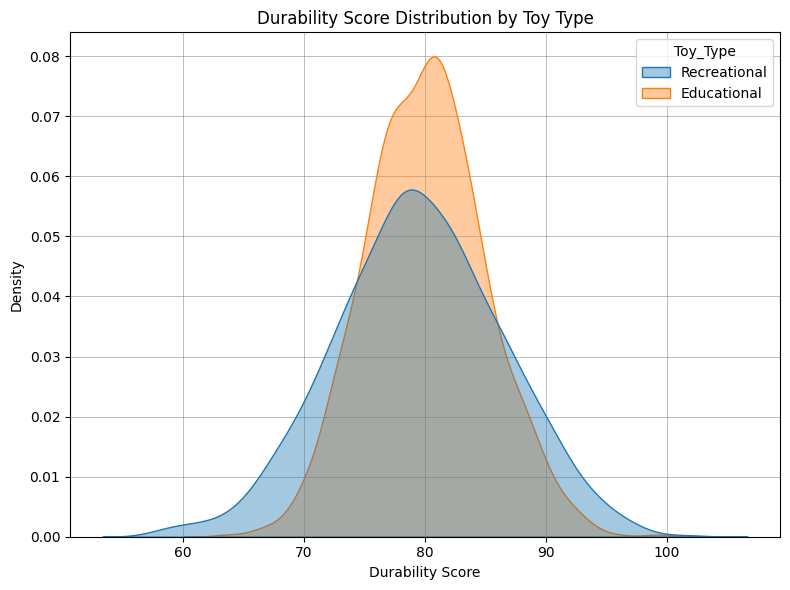

In [67]:
# Visualize the distribution of Durability_Score for each Toy_Type
fig, ax = plt.subplots(figsize=(8, 6))

# Use the axes-level function kdeplot (displot is figure-level and does not accept ax=)
sns.kdeplot(
    data=toy_durability,
    x="Durability_Score",
    hue="Toy_Type",
    fill=True,
    common_norm=False,
    alpha=0.4,
    ax=ax,
)

ax.set(
    title="Durability Score Distribution by Toy Type",
    xlabel="Durability Score",
    ylabel="Density",
)
ax.grid(True, alpha=0.6, linewidth=0.6, color="grey")
ax.set_axisbelow(True)
plt.tight_layout()
plt.show()

## Power Analysis: Sample Size, Effect Size, and Cohen's d

**Power analysis** is a statistical method used to determine the appropriate **sample size** for a study. This calculation depends on the desired **statistical power**, the **significance level (alpha)**, and the expected **effect size**, which is a standardized measure that quantifies the magnitude of the difference between groups.

### The Four Pillars of Power Analysis

A power analysis involves the interplay of four key parameters. If you know any three of them, you can calculate the fourth. This is essential for designing robust experiments *before* you collect any data.

1.  **Statistical Power**: The probability of correctly rejecting a false null hypothesis ($1 - \\beta$). It is the probability of detecting a real effect, if one exists. A common target is 0.80 (80%).
2.  **Significance Level ($\\alpha$)**: The probability of a Type I error (a false positive), typically set at 0.05.
3.  **Sample Size (`n`)**: The number of observations in the study. This is often the variable we want to solve for.
4.  **Effect Size**: A standardized measure that quantifies the magnitude of the phenomenon of interest.

### Quantifying Effect Size with Cohen's d

For comparing the means of two independent groups, the most common measure of effect size is **Cohen's d**. It expresses the difference between the two means in terms of their pooled standard deviation.

The formula is:
$$d = \frac{\bar{x}_1 - \bar{x}_2}{s_{pooled}}$$Where the pooled standard deviation, $s\_{pooled}$, is a weighted average of the two sample standard deviations:$$s_{pooled} = \sqrt{\frac{(n_1-1)s_1^2 + (n_2-1)s_2^2}{n_1 + n_2 - 2}}$$

**Interpretation of Cohen's d**:

  * `d ≈ 0.2`: Small effect
  * `d ≈ 0.5`: Medium effect
  * `d ≈ 0.8`: Large effect

#### Calculating Cohen's d from Scratch

You can implement this formula directly using NumPy. This approach is valuable for understanding the mechanics of the calculation.

```python
import numpy as np

def cohens_d(group1, group2):
    """Calculates Cohen's d for two independent groups."""
    # n: sample sizes
    n1, n2 = len(group1), len(group2)
    
    # s: sample variances (ddof=1 for sample variance)
    var1, var2 = np.var(group1, ddof=1), np.var(group2, ddof=1)
    
    # Calculate pooled standard deviation
    pooled_std = np.sqrt(((n1 - 1) * var1 + (n2 - 1) * var2) / (n1 + n2 - 2))
    
    # Calculate difference in means
    diff = np.mean(group1) - np.mean(group2)
    
    # Calculate Cohen's d
    d = diff / pooled_std
    
    return d
```

#### Calculating Cohen's d with `pingouin`

While calculating from scratch is instructive, using a well-tested library like `pingouin` is generally safer and more convenient for practical applications. The `pingouin.ttest` function returns Cohen's d as part of its output.

### A Complete Practical Example

Let's tie this all together. We will generate sample data, calculate Cohen's d using both methods, and then use that effect size to determine the required sample size for a new study.

```python
import pandas as pd
import pingouin
from statsmodels.stats.power import TTestIndPower

# 1. Create a generic, reproducible dataset with two independent groups
np.random.seed(42)
df = pd.DataFrame({
    'group': ['Treatment'] * 50 + ['Control'] * 50,
    'score': np.concatenate([
        np.random.normal(loc=105, scale=15, size=50), # Treatment group
        np.random.normal(loc=100, scale=15, size=50)  # Control group
    ])
})
group_treatment = df[df['group'] == 'Treatment']['score']
group_control = df[df['group'] == 'Control']['score']

# 2. Calculate Cohen's d
# Method A: From scratch
d_scratch = cohens_d(group_treatment, group_control)
print(f"Cohen's d (from scratch): {d_scratch:.4f}")

# Method B: Using pingouin
ttest_results = pingouin.ttest(x=group_treatment, y=group_control)
d_pingouin = ttest_results['cohen-d'].iloc[0]
print(f"Cohen's d (from pingouin): {d_pingouin:.4f}")

# 3. Conduct Power Analysis to find required sample size
# Let's assume the effect size we just calculated is what we expect in a future study.
# How many subjects would we need to achieve 90% power?
power_analysis = TTestIndPower()
required_n = power_analysis.solve_power(
    effect_size=d_pingouin,
    alpha=0.05,
    power=0.90 # The desired power
)
print(f"Required sample size per group (for 90% power): {np.ceil(required_n)}")
```

### The Relationship Between Effect Size and Sample Size

There is a crucial inverse relationship between effect size and the required sample size: **to reliably detect a smaller effect size, you need a larger sample size.**

A power analysis can visualize this trade-off, showing how the sample size requirement explodes as the effect size you are trying to detect gets smaller.

```python
import matplotlib.pyplot as plt

# Visualize the relationship 
effect_sizes = np.linspace(0.1, 1.0, 10)
sample_sizes = [
    power_analysis.solve_power(effect_size=es, alpha=0.05, power=0.80) 
    for es in effect_sizes
]

import seaborn as sns

sns.set(style="whitegrid", rc={"figure.figsize": (10, 6)})

fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(x=effect_sizes, y=sample_sizes, marker="o", ax=ax)
ax.set_title("Effect Size vs. Required Sample Size (for 80% Power)")
ax.set_xlabel("Effect Size (Cohen's d)")
ax.set_ylabel("Required Sample Size per Group")
ax.grid(True, linestyle='--', alpha=0.6)
fig.tight_layout()
plt.show()
```


In [70]:
from statsmodels.stats.power import TTestIndPower

power_analysis = TTestIndPower()

# Compute the statistical power for an independent t-test:
# - effect_size: Cohen's d (here d=1, a large effect)
# - nobs1: number of observations in group 1 (30)
# - alpha: significance level (0.05)
# Note: ratio defaults to 1 (equal group sizes), so this assumes nobs2 = nobs1.
power = power_analysis.solve_power(effect_size=1, nobs1=30, alpha=0.05)

print(power)

0.9677082582419323


In [71]:
def cohens_d(group1, group2):
    diff = group1.mean() - group2.mean()
    n1, n2 = len(group1), len(group2)
    var1, var2 = group1.var(), group2.var()
    pooled_std = np.sqrt(((n1 - 1) * var1 + (n2 - 1) * var2) / (n1 + n2 - 2))
    d = diff / pooled_std
    return d

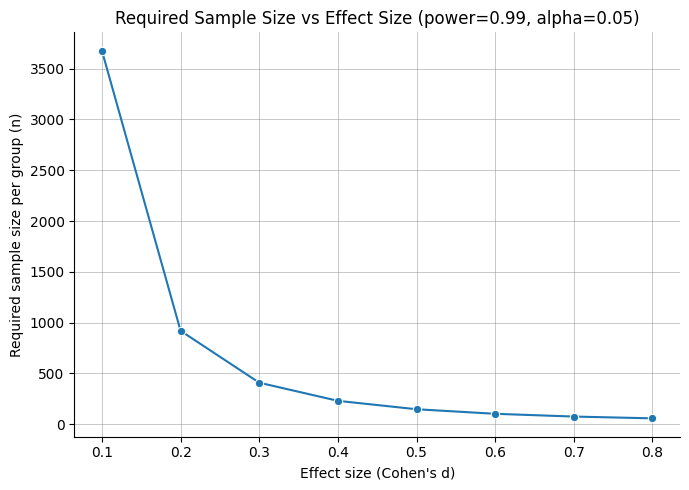

In [73]:
fig, ax = plt.subplots(figsize=(7, 5))

effect_sizes = np.linspace(0.1, 0.8, 8)
sample_sizes = [
    power_analysis.solve_power(effect_size=es, alpha=0.05, power=0.99, ratio=1)
    for es in effect_sizes
]

sns.lineplot(x=effect_sizes, y=sample_sizes, marker="o", ax=ax)
sns.despine()

ax.set(
    xlabel="Effect size (Cohen's d)",
    ylabel="Required sample size per group (n)",
    title="Required Sample Size vs Effect Size (power=0.99, alpha=0.05)",
)
ax.grid(True, alpha=0.5, linewidth=0.6, color="grey")

plt.tight_layout()
plt.show()

### Estimating required sample size for energy study
In the energy sector, researchers are often tasked with evaluating the effectiveness of new technologies or initiatives to enhance energy efficiency or reduce consumption. A study is being designed to compare the impact of two energy-saving measures: "Smart Thermostats" and "LED Lighting". To ensure the study has sufficient power to detect a meaningful difference in energy savings between these two measures, you'll conduct a power analysis.

In [74]:
# Instantiate a TTestIndPower object.
from statsmodels.stats.power import TTestIndPower

power_analysis = TTestIndPower()


# Conduct the power analysis to estimate the required sample size for each group (Smart Thermostats and LED Lighting) to achieve a power of 0.9, assuming a moderate effect size (Cohen's d = 0.5) and an alpha of 0.05 with an equal sized groups.
required_n = power_analysis.solve_power(effect_size=0.5, alpha=0.05, power=0.9, ratio=1)

print(required_n)

85.03128411544918


## Synthesizing Insights from Complex Experiments

To synthesize insights from complex experiments, you'll first need to **merge** disparate data sources into a unified dataset. Then, you'll use **advanced visualizations**, such as multi-faceted scatter plots and grouped bar charts, to explore the relationships between multiple variables. Finally, you must tailor the communication of these findings to either a **technical** or **non-technical** audience.


### The Challenge: Synthesizing Complex Experimental Data

Real-world experiments are rarely simple. You'll often end up with multiple factors, several different outcome measures, and data that might be scattered across different files. For example, in a manufacturing setting, you might have one dataset for `YieldStrength` and another for `ProductQuality`.

The analytical challenge isn't just to analyse one piece in isolation, but to integrate all of them to build a holistic understanding, uncover potential interactions, and communicate the findings effectively.

### Data Integration with `pandas.merge`

So, where do you start? The first step is to get all your data into a single, cohesive DataFrame. This is where you'll use `pandas.merge()`, the standard tool for performing database-style joins.

**The goal** is to combine DataFrames that share a common key or index (like a `BatchID` or `UserID`). You do this by specifying the DataFrames to join and the column(s) to join `on`.

```python
import pandas as pd
import numpy as np

# Let's create two example DataFrames with a common key
np.random.seed(42)
yield_data = pd.DataFrame({
    'BatchID': np.arange(1, 101),
    'MaterialType': np.random.choice(['Polymer', 'Metal'], 100),
    'YieldStrength': np.random.normal(50, 5, 100)
})

quality_data = pd.DataFrame({
    'BatchID': np.arange(1, 101),
    'ProductionSpeed': np.random.choice(['Low', 'High'], 100),
    'ProductQuality': np.random.normal(92, 2, 100)
})

# Merge the two datasets on their common key, 'BatchID'
merged_data = pd.merge(yield_data, quality_data, on='BatchID')

# Display the head of the newly created unified DataFrame
print(merged_data.head())
```

### Visualizing Multi-Factor Relationships

With your unified dataset, it's time to explore. How do all these variables interact? The Object-Oriented (OOP) approach with `seaborn` and `matplotlib` gives you the most control for creating clear, publication-quality plots.

#### **How do you compare a numeric value across two different categories?**

Let's say you want to compare `YieldStrength` across both `MaterialType` and `ProductionSpeed`. A **grouped bar chart** is an excellent tool for this, as it displays the mean of the numeric variable for each combination of the categories.

```python
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure and a set of subplots (in this case, just one)
fig, ax = plt.subplots(figsize=(10, 6))

# Pass the axes object `ax` to seaborn's barplot function
sns.barplot(
    data=merged_data,
    x='MaterialType',
    y='YieldStrength',
    hue='ProductionSpeed',
    ax=ax
)

ax.set_title('Mean Yield Strength by Material Type and Production Speed')
ax.set_xlabel('Material Type')
ax.set_ylabel('Yield Strength')
ax.grid(axis='y', linestyle='--')
plt.show()
```

#### **How do you explore the relationship between two numeric variables, segmented by a category?**

Now, what if you want to see the relationship between `YieldStrength` and `ProductQuality`, but you suspect it might be different for different `ProductionSpeed` levels? A **multi-hue scatter plot** is the perfect tool.

```python
# Create a new figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Pass the axes object `ax` to seaborn's scatterplot function
sns.scatterplot(
    data=merged_data,
    x='YieldStrength',
    y='ProductQuality',
    hue='ProductionSpeed',
    style='ProductionSpeed', # Use different markers for better accessibility
    ax=ax
)

ax.set_title('Yield Strength vs. Product Quality by Production Speed')
ax.set_xlabel('Yield Strength')
ax.set_ylabel('Product Quality')
ax.grid(True, linestyle='--')
plt.show()
```

### Communicating Insights: Tailoring to Your Audience

Great analysis is useless if you can't communicate it effectively. The way you present your findings should change dramatically based on who you're talking to.

#### **Communicating with a Non-Technical Audience**

Your goal here is **clarity, simplicity, and real-world relevance**.

  * **Simplify the Insight**: Translate complex statistical findings into plain, impactful language. Instead of discussing p-values, focus on the practical outcome. For example, "The new mobile app converts **50% more** customers than the web browser."
  * **Use Clear Visuals**: Rely on simple, universally understood charts like bar and line plots. Avoid visualizations that require statistical knowledge to interpret.
  * **Focus on the "Why"**: Connect the data to its real-world application. Explain why the findings matter and how they can inform decisions.

#### **Communicating with a Technical Audience**

Your goal here is to present a **rigorous, transparent, and reproducible data narrative**.

  * **Craft a Data Narrative**: Present the full statistical story. This includes the test statistics, p-values, significance levels, and confidence intervals that support your conclusions.
  * **Use Advanced Visuals**: Employ more complex visualizations that can reveal nuanced, multi-variable relationships. Heatmaps, multi-hue scatter plots, and projections are all appropriate.
  * **Provide Full Context**: Be prepared to discuss your experimental design, the statistical methods you chose, any assumptions you made, and the limitations of your analysis.

In [75]:
url = "https://assets.datacamp.com/production/repositories/6639/datasets/f540d521fb9da4e7996e7da7e9341cc836e792dc/loan_approval_yield.csv"
loan_approval_yield = pd.read_csv(
    url, usecols=lambda col: not col.startswith("Unnamed")
)
loan_approval_yield.head()

,ApplicationID,LoanAmount,CreditScore,EmploymentStatus,ApprovalYield
0,1,High,Excellent,Unemployed,0.183435
1,2,Low,Poor,Self-Employed,0.445833
2,3,High,Good,Self-Employed,0.866176
3,4,High,Fair,Unemployed,0.969910
4,5,Medium,Fair,Employed,0.181825


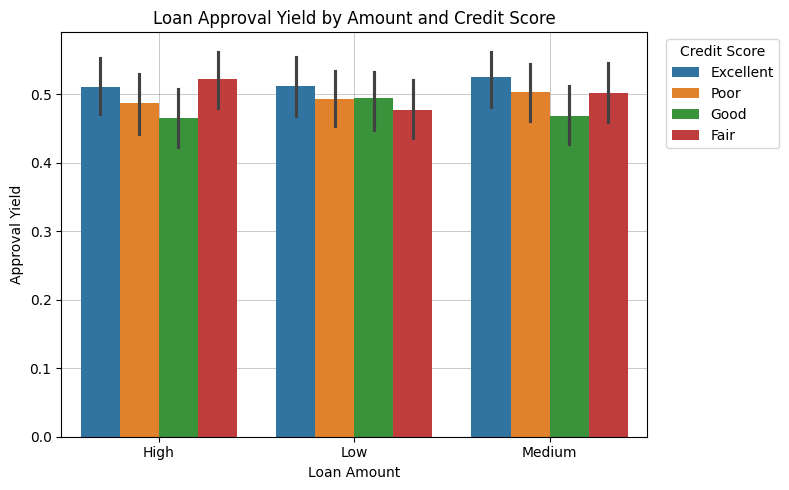

In [76]:
fig, ax = plt.subplots(figsize=(8, 5))

# Use seaborn's barplot for a side-by-side (dodge) bar chart
sns.barplot(
    data=loan_approval_yield,
    x="LoanAmount",
    y="ApprovalYield",
    hue="CreditScore",
    ax=ax,
    dodge=True,
)

ax.set_title("Loan Approval Yield by Amount and Credit Score")
ax.set_xlabel("Loan Amount")
ax.set_ylabel("Approval Yield")
ax.grid(True, alpha=0.5, linewidth=0.6, color="grey")
ax.set_axisbelow(True)

# Move legend outside the plot for readability
ax.legend(title="Credit Score", bbox_to_anchor=(1.02, 1), loc="upper left")

plt.tight_layout()
plt.show()

### Exploring customer satisfaction
Merging datasets is a crucial skill in data analysis, especially when dealing with related data from different sources. You're working on a project for a financial institution to understand the relationship between loan approval rates and customer satisfaction. Two separate studies have been conducted: one focusing on loan approval yield based on various factors, and another on customer satisfaction under different conditions. Your task is to analyze how approval yield correlates with customer satisfaction, considering another variable such as interest rates.

In [78]:
url = "https://assets.datacamp.com/production/repositories/6639/datasets/a120ec6b314363d0d37a40f390d75da0aae1053b/customer_satisfaction.csv"
customer_satisfaction = pd.read_csv(
    url, usecols=lambda col: not col.startswith("Unnamed")
)
customer_satisfaction.head()

,ApplicationID,ResponseTime,InterestRate,CustomerInteraction,SatisfactionQuality
0,1,Fast,Low,Poor,0.204979
1,2,Moderate,High,Good,0.462610
2,3,Slow,Medium,Average,0.874398
3,4,Moderate,High,Average,0.428884
4,5,Fast,High,Poor,0.126637


In [79]:
# Merge loan_approval_yield with customer_satisfaction.
merged_data = pd.merge(loan_approval_yield, customer_satisfaction, on="ApplicationID")
merged_data.head()

,ApplicationID,LoanAmount,CreditScore,EmploymentStatus,ApprovalYield,ResponseTime,InterestRate,CustomerInteraction,SatisfactionQuality
0,1,High,Excellent,Unemployed,0.183435,Fast,Low,Poor,0.204979
1,2,Low,Poor,Self-Employed,0.445833,Moderate,High,Good,0.462610
2,3,High,Good,Self-Employed,0.866176,Slow,Medium,Average,0.874398
3,4,High,Fair,Unemployed,0.969910,Moderate,High,Average,0.428884
4,5,Medium,Fair,Employed,0.181825,Fast,High,Poor,0.126637


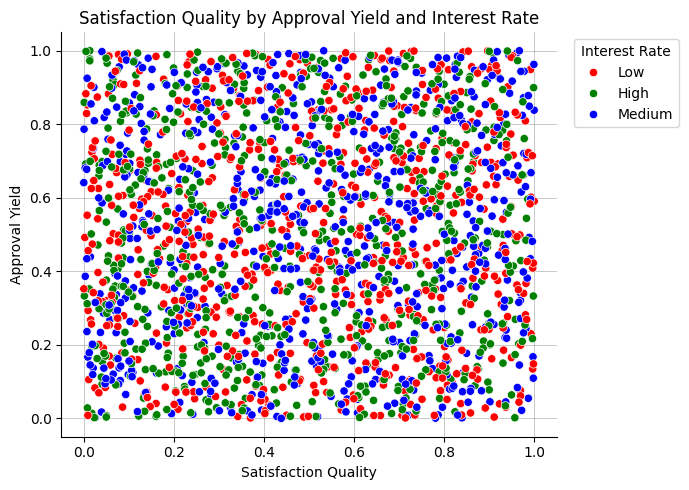

In [101]:
# Create scatter plot with colorbar mapping to InterestRate
fig, ax = plt.subplots(figsize=(7, 5))

# Create scatter plot using scatterplot (axes-level function)
sns.scatterplot(
    x="ApprovalYield",
    y="SatisfactionQuality",
    hue="InterestRate",
    palette={"Low": "red", "High": "green", "Medium": "blue"},
    data=merged_data,
    ax=ax,
)

# Remove top and right spines
sns.despine()

# Set titles and labels
ax.set_title("Satisfaction Quality by Approval Yield and Interest Rate")
ax.set_xlabel("Satisfaction Quality")
ax.set_ylabel("Approval Yield")

# Add grid
ax.grid(True, alpha=0.5, linewidth=0.6, color="grey")
ax.set_axisbelow(True)
# Move legend outside the plot for readability
ax.legend(title="Interest Rate", bbox_to_anchor=(1.02, 1), loc="upper left")

plt.tight_layout()
plt.show()

## Identifying Complexities in Experimental Data

Real-world data rarely meets the clean, idealized assumptions of basic statistical models. Before applying a test like an ANOVA or a linear regression, it is crucial to perform diagnostic checks to identify common complexities. Failing to do so can lead to invalid conclusions. The main issues to look for are:

1.  **Interaction Effects**: Occur when the effect of one explanatory variable on the response depends on the level of another explanatory variable.
2.  **Heteroscedasticity**: Occurs when the variance of the model's errors is not constant across the range of the explanatory variables.
3.  **Non-Normality**: Occurs when the data or the model's residuals do not follow a normal (bell-shaped) distribution, which is a key assumption for many parametric tests.

### A Diagnostic and Mitigation Workflow

A robust analysis involves a systematic process of identifying and addressing these potential issues.

#### 1. Diagnosing Interactions

The first step is to explore potential interactions between your explanatory variables. A multi-hue scatter plot is the primary visual tool for assessing an interaction between a numeric and a categorical variable.

  * **Interpretation**: If the clusters of points for different categories show distinct trends (e.g., different slopes or starting points), an interaction is likely present.

<!-- end list -->

```python
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import boxcox

# Create a generic, reproducible dataset with known complexities
np.random.seed(42)
df = pd.DataFrame({
    'RockType': np.random.choice(['Igneous', 'Sedimentary'], 200),
    'MineralHardness': np.random.uniform(2, 7, 200)
})

# Create a non-linear relationship with heteroscedasticity and an interaction
df['RockPorosity'] = 10 + \
    (df['MineralHardness'] - 4)**2 * (df['RockType'].apply(lambda x: 0.5 if x == 'Igneous' else -1)) + \
    np.random.normal(0, df['MineralHardness']) * 2

# Ensure all values are positive for Box-Cox
df['RockPorosity'] = df['RockPorosity'] - df['RockPorosity'].min() + 1

# Visualize Interaction
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(data=df, x='MineralHardness', y='RockPorosity', hue='RockType', ax=ax)
ax.set_title("Diagnosing Interactions: Porosity vs. Hardness by Rock Type")
plt.show()
```

The plot shows that the relationship between `MineralHardness` and `RockPorosity` is different for the two `RockType` categories, suggesting an interaction.

#### 2. Diagnosing Heteroscedasticity and Non-Linearity

A **residuals vs. fitted plot** is the standard diagnostic tool for checking for both non-linearity in the model and heteroscedasticity. The `seaborn.residplot` function is a convenient way to generate this.

  * **Interpretation**: A "good" residual plot shows a random, horizontal band of points centered on zero. A clear curve (like the "U" shape in our example) indicates the model failed to capture a non-linear relationship. A funnel or cone shape indicates heteroscedasticity.

<!-- end list -->

```python
#  Visualize Heteroscedasticity
fig, ax = plt.subplots(figsize=(10, 6))
sns.residplot(data=df, x='MineralHardness', y='RockPorosity', lowess=True, ax=ax,
              line_kws={'color': 'red', 'lw': 2})
ax.set_title("Diagnosing Heteroscedasticity: Residual Plot")
plt.show()
```

The curved trend line (the `lowess` line) and the fanning out of the points confirm that our data violates the assumptions of linearity and homoscedasticity.

#### 3. Mitigating with Data Transformations

When assumptions are violated, we can often apply a mathematical function to the response variable to **transform** the data. The **Box-Cox transformation** is a powerful, data-driven method that finds the best power transformation to make the data more normally distributed and to stabilize its variance. A key constraint is that it can only be applied to positive data.

After applying the transformation, we must **re-run our diagnostics** on the new, transformed variable to verify that the issues have been mitigated.

```python
# Apply Box-Cox Transformation 
df['TransformedRockPorosity'], _ = boxcox(df['RockPorosity'])

# Verify the Transformation
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle("Verifying the Transformation", fontsize=16)

# 1. Check the distribution before and after
sns.kdeplot(df['RockPorosity'], ax=axes[0], fill=True, label='Original')
sns.kdeplot(df['TransformedRockPorosity'], ax=axes[0], fill=True, label='Transformed')
axes[0].set_title('Distribution of Response Variable')
axes[0].legend()

# 2. Check the residual plot again with the transformed data
sns.residplot(data=df, x='MineralHardness', y='TransformedRockPorosity', lowess=True, 
              ax=axes[1], line_kws={'color': 'red', 'lw': 2})
axes[1].set_title('Residual Plot After Transformation')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
```

The diagnostics on the transformed data show a marked improvement. The distribution of `TransformedRockPorosity` is now much more symmetric and bell-shaped. More importantly, the residual plot is significantly better: the points form a more random, horizontal band, and the red trend line is much flatter and closer to zero. This indicates that the transformation has successfully stabilized the variance, making the data more suitable for parametric modeling.

In [105]:
url = "https://raw.githubusercontent.com/jhlopesalves/data-science-practice-notebook/refs/heads/main/Python/statistics/experimental_design/data/food_preservation.csv"
food_preservation = pd.read_csv(url, usecols=lambda col: not col.startswith("Unnamed"))
food_preservation.head()

,ProductID,PreservationMethod,FoodType,NutrientRetention,ShelfLife
0,1,Drying,Fruit,59.17,184.04
1,2,Freezing,Meat,72.29,104.46
2,3,Drying,Fruit,80.06,75.03
3,4,Canning,Fruit,98.50,103.34
4,5,Canning,Vegetable,59.09,97.46


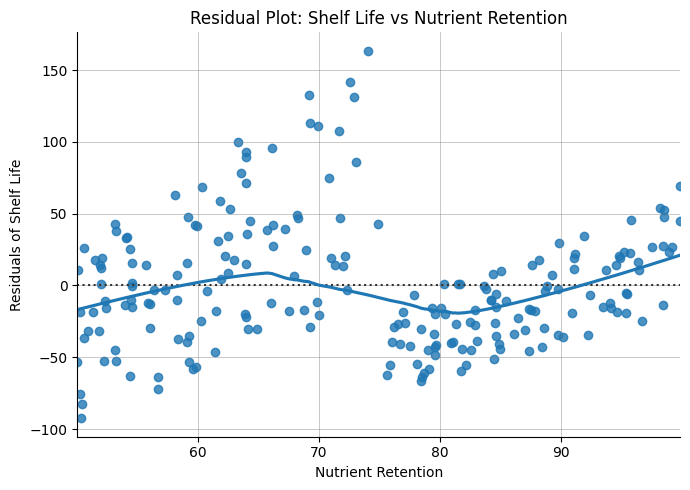

In [106]:
# Use an appropriate plot to check for heteroscedasticity between 'NutrientRetention' and 'ShelfLife'.
fig, ax = plt.subplots(figsize=(7, 5))
sns.residplot(
    x="NutrientRetention", y="ShelfLife", data=food_preservation, lowess=True, ax=ax
)
ax.set(
    xlabel="Nutrient Retention",
    ylabel="Residuals of Shelf Life",
    title="Residual Plot: Shelf Life vs Nutrient Retention",
)
ax.grid(True, alpha=0.5, linewidth=0.6, color="grey")
sns.despine(ax=ax)
plt.tight_layout()
plt.show()

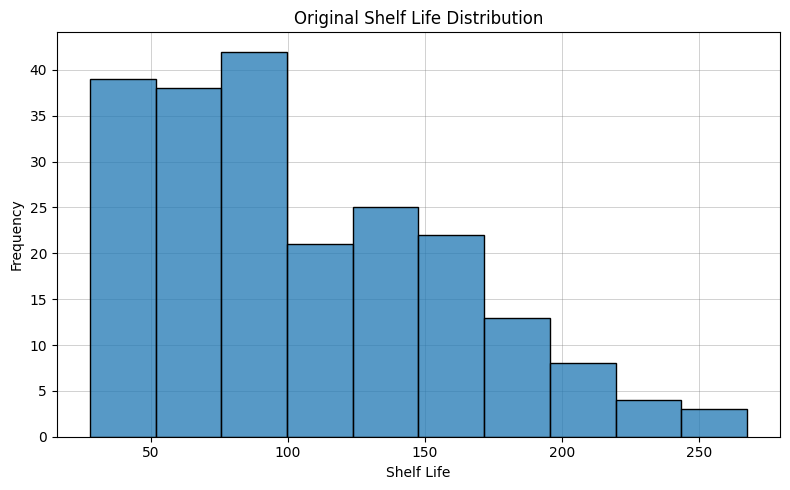

In [115]:
# Visualize the original ShelfLife distribution using OOP approach
fig, ax = plt.subplots(figsize=(8, 5))

sns.histplot(
    food_preservation["ShelfLife"],
    kde=False,
    ax=ax,
)

ax.set_title("Original Shelf Life Distribution")
ax.set_xlabel("Shelf Life")
ax.set_ylabel("Frequency")
ax.grid(True, alpha=0.5, linewidth=0.5, color="grey")
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()

In [116]:
from scipy.stats import boxcox

# Create a Box-Cox transformation
ShelfLifeTransformed, _ = boxcox(food_preservation["ShelfLife"])

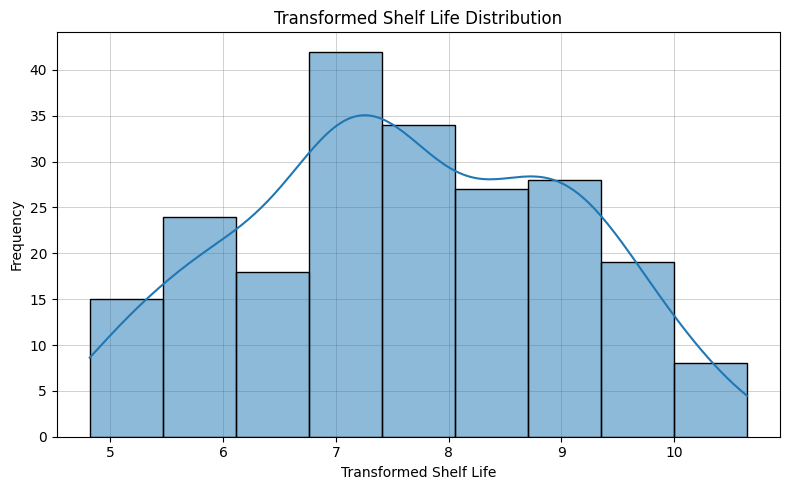

In [118]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.histplot(ShelfLifeTransformed, kde=True, ax=ax)

ax.set(
    title="Transformed Shelf Life Distribution",
    xlabel="Transformed Shelf Life",
    ylabel="Frequency",
)

ax.grid(True, alpha=0.5, linewidth=0.5, color="grey")
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()